Porblem Statement :
--------------------------------    
X Education sells online courses to industry professionals.

Everyday many professionals who are interested in the courses land on their website and browse for courses.These users are classified as potential leads to take the course.

Currently the conversion rate is very poor. The company wishes to identify the most potential leads, also known as ‘Hot Leads’.

With the Hot Leads, the Sales team will focus more on communicating with the them rather than making calls to everyone.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\RAJDEEP\\Upgrad_Main_Module_Classes\\Logistic_Regression_Assignment'

In [3]:
data = pd.read_csv("Leads.csv")

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.shape

(9240, 37)

In [7]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking the class imbalance in the target column

In [8]:
data['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

- It seems that there is slight class imbalance present in the target variable but it is not too much.

#### Initial Observation

- With our initial study we saw that few attributes have a category called 'Select' which indicates tht there are presence of null vaues. Select apparently seems that applicants didn't choose any value . as a result it came as 'Select'.
- We can replace these 'Select' by null in order to handle null values properly.

In [9]:
data_copy = data.copy()

In [10]:
data_copy = data_copy.replace('Select', np.nan)

### Checking for null values

In [11]:
count = 0
for i in list(data_copy.columns):
    if data_copy[i].isna().sum() > 0:
        count += 1
        
        print("The column - "+ i + " - has null values:-> {} , which is -> {}% ".format(data_copy[i].isna().sum(), 
                                                                                round((data_copy[i].isna().sum()/len(data)) * 100,2)) )
print('\n')
print("The total number of columns having null values is: {}".format(count))
print('\n')

# null_column_valid_list = []
null_column_list_0_20_percent = []
null_column_list_20_40_percent = []
null_column_list_40_50_percent = []
null_column_list_50_60_percent = []
null_column_list_60_70_percent = []
null_column_list_70_80_percent = []
null_column_list_more_80_percent = []

#count_1 = 0
for i in list(data_copy.columns):
    
    if data_copy[i].isna().sum() > 0:
        
        if round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) >= 0 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 20 :
            null_column_list_0_20_percent.append(i)
            
        elif round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) > 20 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 40 :
            null_column_list_20_40_percent.append(i)
            
        elif round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) > 40 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 50 :
            null_column_list_40_50_percent.append(i)
            
        elif round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) > 50 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 60 :
            null_column_list_50_60_percent.append(i)
            
        elif round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) > 60 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 70 :
            null_column_list_60_70_percent.append(i)
            
        elif round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) > 70 and round((data_copy[i].isna().sum()/len(data_copy)) * 100, 2 ) <= 80 :
            null_column_list_70_80_percent.append(i)
            
        else :
            null_column_list_more_80_percent.append(i)
            
            
print("The number of columns which have less than or equal to 20 percent null values: {}".format(len(null_column_list_0_20_percent)))
print("The number of columns which have 20 to 40 percent null values: {}".format(len(null_column_list_20_40_percent)))
print("The number of columns which have 40 to 50 percent null values: {}".format(len(null_column_list_40_50_percent)))
print("The number of columns which have 50 to 60 percent null values: {}".format(len(null_column_list_50_60_percent)))
print("The number of columns which have 60 to 70 percent null values: {}".format(len(null_column_list_60_70_percent)))
print("The number of columns which have 70 to 80 percent null values: {}".format(len(null_column_list_70_80_percent)))
print("The number of columns which have more than 80 percent null values: {}".format(len(null_column_list_more_80_percent)))

The column - Lead Source - has null values:-> 36 , which is -> 0.39% 
The column - TotalVisits - has null values:-> 137 , which is -> 1.48% 
The column - Page Views Per Visit - has null values:-> 137 , which is -> 1.48% 
The column - Last Activity - has null values:-> 103 , which is -> 1.11% 
The column - Country - has null values:-> 2461 , which is -> 26.63% 
The column - Specialization - has null values:-> 3380 , which is -> 36.58% 
The column - How did you hear about X Education - has null values:-> 7250 , which is -> 78.46% 
The column - What is your current occupation - has null values:-> 2690 , which is -> 29.11% 
The column - What matters most to you in choosing a course - has null values:-> 2709 , which is -> 29.32% 
The column - Tags - has null values:-> 3353 , which is -> 36.29% 
The column - Lead Quality - has null values:-> 4767 , which is -> 51.59% 
The column - Lead Profile - has null values:-> 6855 , which is -> 74.19% 
The column - City - has null values:-> 3669 , which

- As we can see that there are 4 columns which have total null values percentage lying in 40-50% so those columns can be dropped.
- Same can be done with the column which has 50-60% null values , as the number of null values are too high so imputing them might lead towards putting impurity of the data.
- There are two columns which have more than 70% null values. Those attributes also can be dropped.

#### Checking the columns which have higher than 40% Null values

In [12]:
null_column_list_40_50_percent

['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [13]:
null_column_list_50_60_percent

['Lead Quality']

In [14]:
null_column_list_70_80_percent

['How did you hear about X Education', 'Lead Profile']

- Though by column description it apparently seems that these 4 columns carry a significant importance for understanding Lead Convertion but as these columns have more than 40 % null values , imputing these can lead to making data impure. 
- Lead Quality also has more than 50% null values. So dropping this column immediately
- Also the 'Prospect ID' and 'Lead Number' don't seem to be a high important column because it's denoting some identification number and it's unique for each instance. By Intuition we can drop these two columns.

#### Renaming few columns

In [15]:
data_copy.rename(columns = {'What is your current occupation':'Current_Occupation'}, inplace=True)
data_copy.rename(columns = {'How did you hear about X Education':'Hear_From'}, inplace=True)
data_copy.rename(columns = {'What is your current occupation':'Current_Occupation'}, inplace=True)
data_copy.rename(columns = {'What matters most to you in choosing a course':'Motivation'}, inplace=True)
data_copy.rename(columns = {'I agree to pay the amount through cheque':'Payment_Mode'}, inplace=True)
data_copy.rename(columns = {'Receive More Updates About Our Courses':'Get_update'}, inplace=True)
data_copy.rename(columns = {'A free copy of Mastering The Interview':'Free_Interview_Copy'}, inplace=True)

#### Dropping the columns which have more than 50% null values

In [16]:
data_copy = data_copy.drop(['Lead Quality','Hear_From'], axis=1)

In [17]:
data_copy = data_copy.drop(['Lead Profile'], axis=1)

In [18]:
data_copy.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [19]:
# plt.figure(figsize=(5,5))
# sns.heatmap(data_copy.corr(),  annot=True,linecolor='blue',linewidth=1.5,cmap='RdYlGn')

In [20]:
# corr1 = data_copy.corr()
# corr1['Converted'].sort_values(ascending=False)

In [21]:
data_copy.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

- The below columns are completely unimportant for this analysis as these are unique identification number.

In [22]:
data_copy.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [23]:
data_copy.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Current_Occupation', 'Motivation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Get_update',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City', 'Payment_Mode',
       'Free_Interview_Copy', 'Last Notable Activity'],
      dtype='object')

### Univariate and Bi-variate analysis of the numerical columns :

#### TotalVisits

<AxesSubplot:xlabel='TotalVisits'>

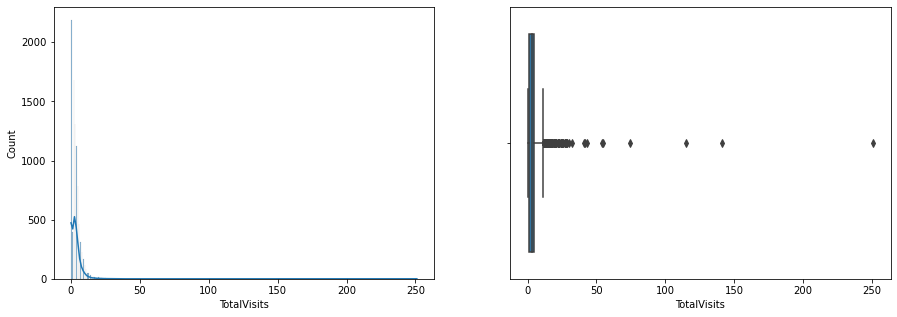

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['TotalVisits'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['TotalVisits'], ax=axes[1])

- The column is highly right skewed and there's presence of outliers in that variable

#### Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

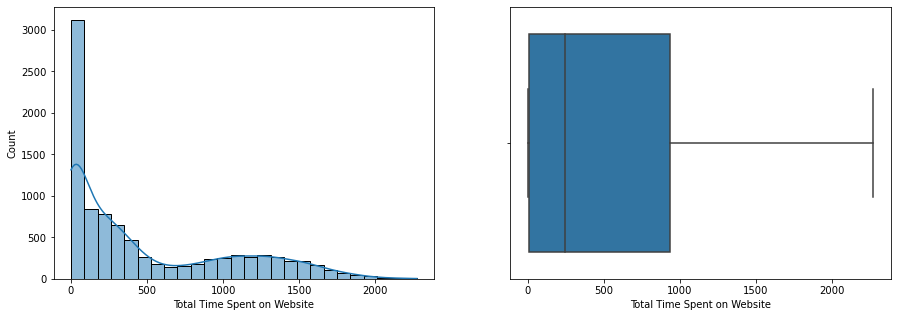

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['Total Time Spent on Website'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['Total Time Spent on Website'], ax=axes[1])

- This is also right skewed and we can see a high count of customers who didn't spend time on website

In [26]:
data_copy.rename(columns = {'Total Time Spent on Website':'Total_Time_Spent'}, inplace=True)

In [27]:
data_copy.groupby(['Total_Time_Spent','Converted']).size().unstack()

Converted,0,1
Total_Time_Spent,,
0,1277.0,916.0
1,4.0,3.0
2,13.0,1.0
3,7.0,2.0
4,10.0,NaN
...,...,...
2207,1.0,NaN
2217,NaN,1.0
2226,1.0,NaN


- We can notice few null values presene but overall Number of converted and non-converted leads both have high counts 0 unit Time spent. That's why the graph is very much skewed. As the total time spent hours is increasing the count of leads also decreasing gradually

#### Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit'>

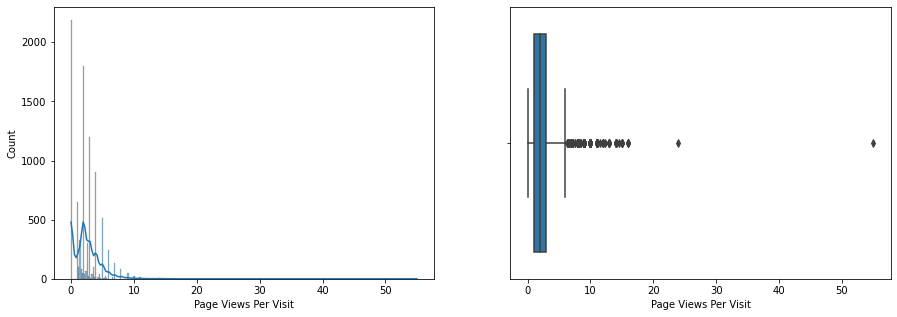

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['Page Views Per Visit'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['Page Views Per Visit'], ax=axes[1])

In [29]:
data_copy.groupby(['Page Views Per Visit','Converted']).size().unstack()

Converted,0,1
Page Views Per Visit,,
0.00,1273.0,916.0
1.00,472.0,179.0
1.14,1.0,1.0
1.17,NaN,1.0
1.19,1.0,NaN
...,...,...
14.50,1.0,NaN
15.00,3.0,1.0
16.00,3.0,NaN


In [30]:
data_copy.groupby(by=['Converted'])['TotalVisits'].agg(['sum','mean','median','count'])

,sum,mean,median,count
Converted,,,,
0,18786.0,3.329670,3.0,5642
1,12576.0,3.633632,3.0,3461


<AxesSubplot:xlabel='Converted'>

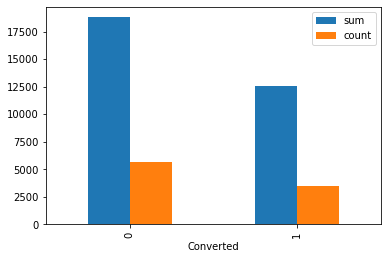

In [31]:
data_copy.groupby(by=['Converted'])['TotalVisits'].agg(['sum','count']).plot(kind='bar')

In [32]:
data_copy.groupby(by=['Converted'])['Total_Time_Spent'].agg(['sum','mean','median','count'])

,sum,mean,median,count
Converted,,,,
0,1876367,330.404473,179.0,5679
1,2629965,738.546757,832.0,3561


In [33]:
data_copy.groupby(by=['Converted'])['Page Views Per Visit'].agg(['sum','mean','median','count'])

,sum,mean,median,count
Converted,,,,
0,13362.81,2.368453,2.0,5642
1,8145.94,2.353638,2.0,3461


<AxesSubplot:xlabel='Converted'>

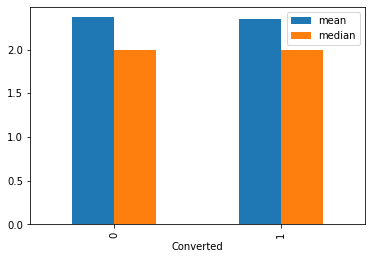

In [34]:
data_copy.groupby(by=['Converted'])['Page Views Per Visit'].agg(['mean','median']).plot(kind='bar')

<AxesSubplot:xlabel='Converted'>

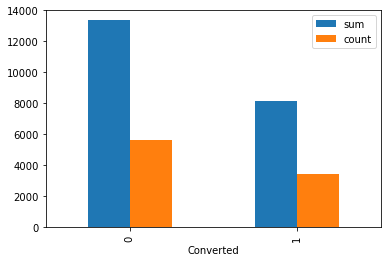

In [35]:
data_copy.groupby(by=['Converted'])['Page Views Per Visit'].agg(['sum','count']).plot(kind='bar')

- Inference:
    - The converted leads have less count for Total Visit than non-converted one.
    - The average time spent on website by converted leads are higher than that of non-converted.
    - The total number of pages viewed in every visit by the non-converted leads is higher than that of converted leads.

In [36]:
data_copy.groupby(by=['Lead Origin'])['Converted'].count()

Lead Origin
API                        3580
Landing Page Submission    4886
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Converted, dtype: int64

In [37]:
data_copy.groupby(['Lead Origin','Converted']).size().unstack(fill_value=0)

Converted,0,1
Lead Origin,,
API,2465,1115
Landing Page Submission,3118,1768
Lead Add Form,54,664
Lead Import,42,13
Quick Add Form,0,1


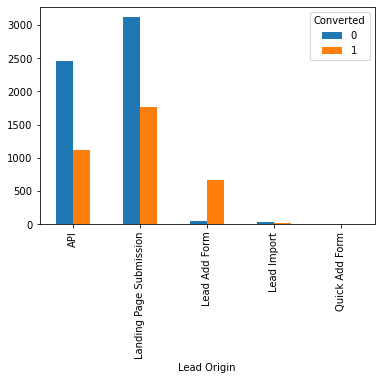

In [38]:
data_copy.groupby(['Lead Origin','Converted']).size().unstack(fill_value=0).plot(kind='bar')
plt.show()

- Inference:
    - 'Lead Add Form' category has higher number of converted lead than non-converted in that category whereas 'Landing Page Submission' has higer number of non-converted lead than that of converted. 
    - Overall in API and Landing Page Submission categories have higher non-converted counts 

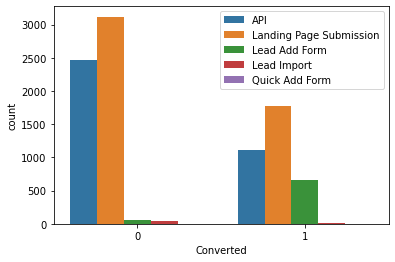

In [39]:
sns.countplot(x='Converted',data=data_copy, hue='Lead Origin')
plt.legend(loc='upper right')

In [40]:
data_copy.groupby(['Lead Source','Converted']).size().unstack(fill_value=0)

Converted,0,1
Lead Source,,
Click2call,1,3
Direct Traffic,1725,818
Facebook,42,13
Google,1721,1147
Live Chat,0,2
NC_EDM,0,1
Olark Chat,1307,448
Organic Search,718,436
Pay per Click Ads,1,0


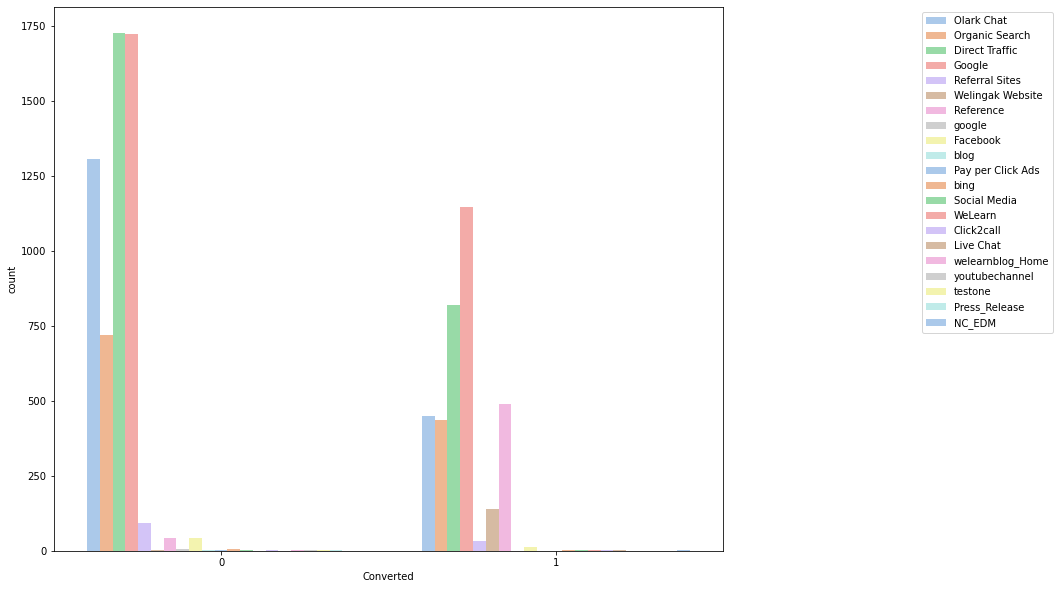

In [41]:
plt.figure(figsize=(12,10))
#custom_palette=['red','green','blue','orange','brown','yellow']
sns.countplot(x='Converted',data=data_copy, hue='Lead Source',palette='pastel')

plt.legend(loc='upper right',bbox_to_anchor=(1.50, 1))
plt.show()

In [42]:
data_copy.groupby(['Do Not Email','Converted']).size().unstack(fill_value=0)

Converted,0,1
Do Not Email,,
No,5063,3443
Yes,616,118


In [43]:
data_copy.groupby(['Do Not Call','Converted']).size().unstack(fill_value=0)

Converted,0,1
Do Not Call,,
No,5679,3559
Yes,0,2


In [44]:
data_copy.groupby(['Last Activity','Converted']).size().unstack(fill_value=0)

Converted,0,1
Last Activity,,
Approached upfront,0,9
Converted to Lead,374,54
Email Bounced,300,26
Email Link Clicked,194,73
Email Marked Spam,0,2
Email Opened,2184,1253
Email Received,0,2
Form Submitted on Website,88,28
Had a Phone Conversation,8,22


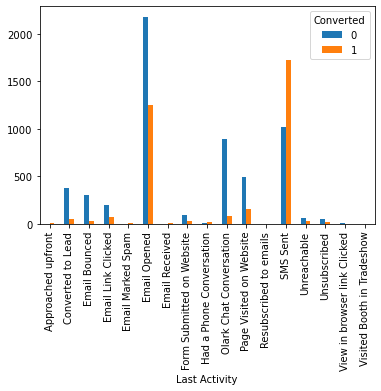

In [45]:
data_copy.groupby(['Last Activity','Converted']).size().unstack(fill_value=0).plot(kind='bar')
plt.show()

- The Leads who have opened email have highest percentage of non-convertion 
- Leads with SMS activity have highest percentage of convertion among all.

In [46]:
data_copy.groupby(['Specialization','Converted']).size().unstack(fill_value=0)

Converted,0,1
Specialization,,
"Banking, Investment And Insurance",171,167
Business Administration,224,179
E-Business,36,21
E-COMMERCE,72,40
Finance Management,540,436
Healthcare Management,80,79
Hospitality Management,66,48
Human Resource Management,460,388
IT Projects Management,226,140


In [47]:
data_copy.groupby(['Specialization','Converted']).size().unstack(fill_value=0).loc[:,1].sort_values(ascending=False)

Specialization
Finance Management                   436
Marketing Management                 408
Human Resource Management            388
Operations Management                238
Business Administration              179
Banking, Investment And Insurance    167
Supply Chain Management              151
IT Projects Management               140
Media and Advertising                 85
Healthcare Management                 79
Travel and Tourism                    72
International Business                64
Hospitality Management                48
E-COMMERCE                            40
Retail Management                     34
Rural and Agribusiness                31
E-Business                            21
Services Excellence                   11
Name: 1, dtype: int64

- In this attribute there were few values 'Select' which we have changed to 'Null' which are not coming here 

In [48]:
data_copy['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:>

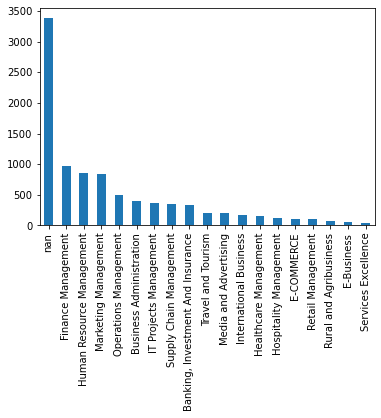

In [49]:
data_copy['Specialization'].value_counts(dropna=False).plot(kind='bar')

In [50]:
data_copy['Specialization'] = data_copy['Specialization'].replace(['Finance Management','Human Resource Management',
                                                                  'Marketing Management','Operations Management',
                                                                  'IT Projects Management','Supply Chain Management',
                                                                  'Healthcare Management','Hospitality Management',
                                                                   'Retail Management'],'Management')

In [51]:
data_copy['Specialization'].value_counts(dropna=False)

Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [52]:
data_copy.shape

(9240, 28)

- We can see that many people haven't given their choice of specialization as a result that has come with the value 'Select'. As a result the whole distribution of this attribute became skewed. If we remove this 'Select' from the whole attribute then the whole attribute will get a distribution shape closer to normal distribution.

In [53]:
data_copy['Specialization'].value_counts()

Management                           4253
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [54]:
selected_specialization = data_copy[data_copy['Specialization']!='Select']

In [55]:
selected_specialization.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


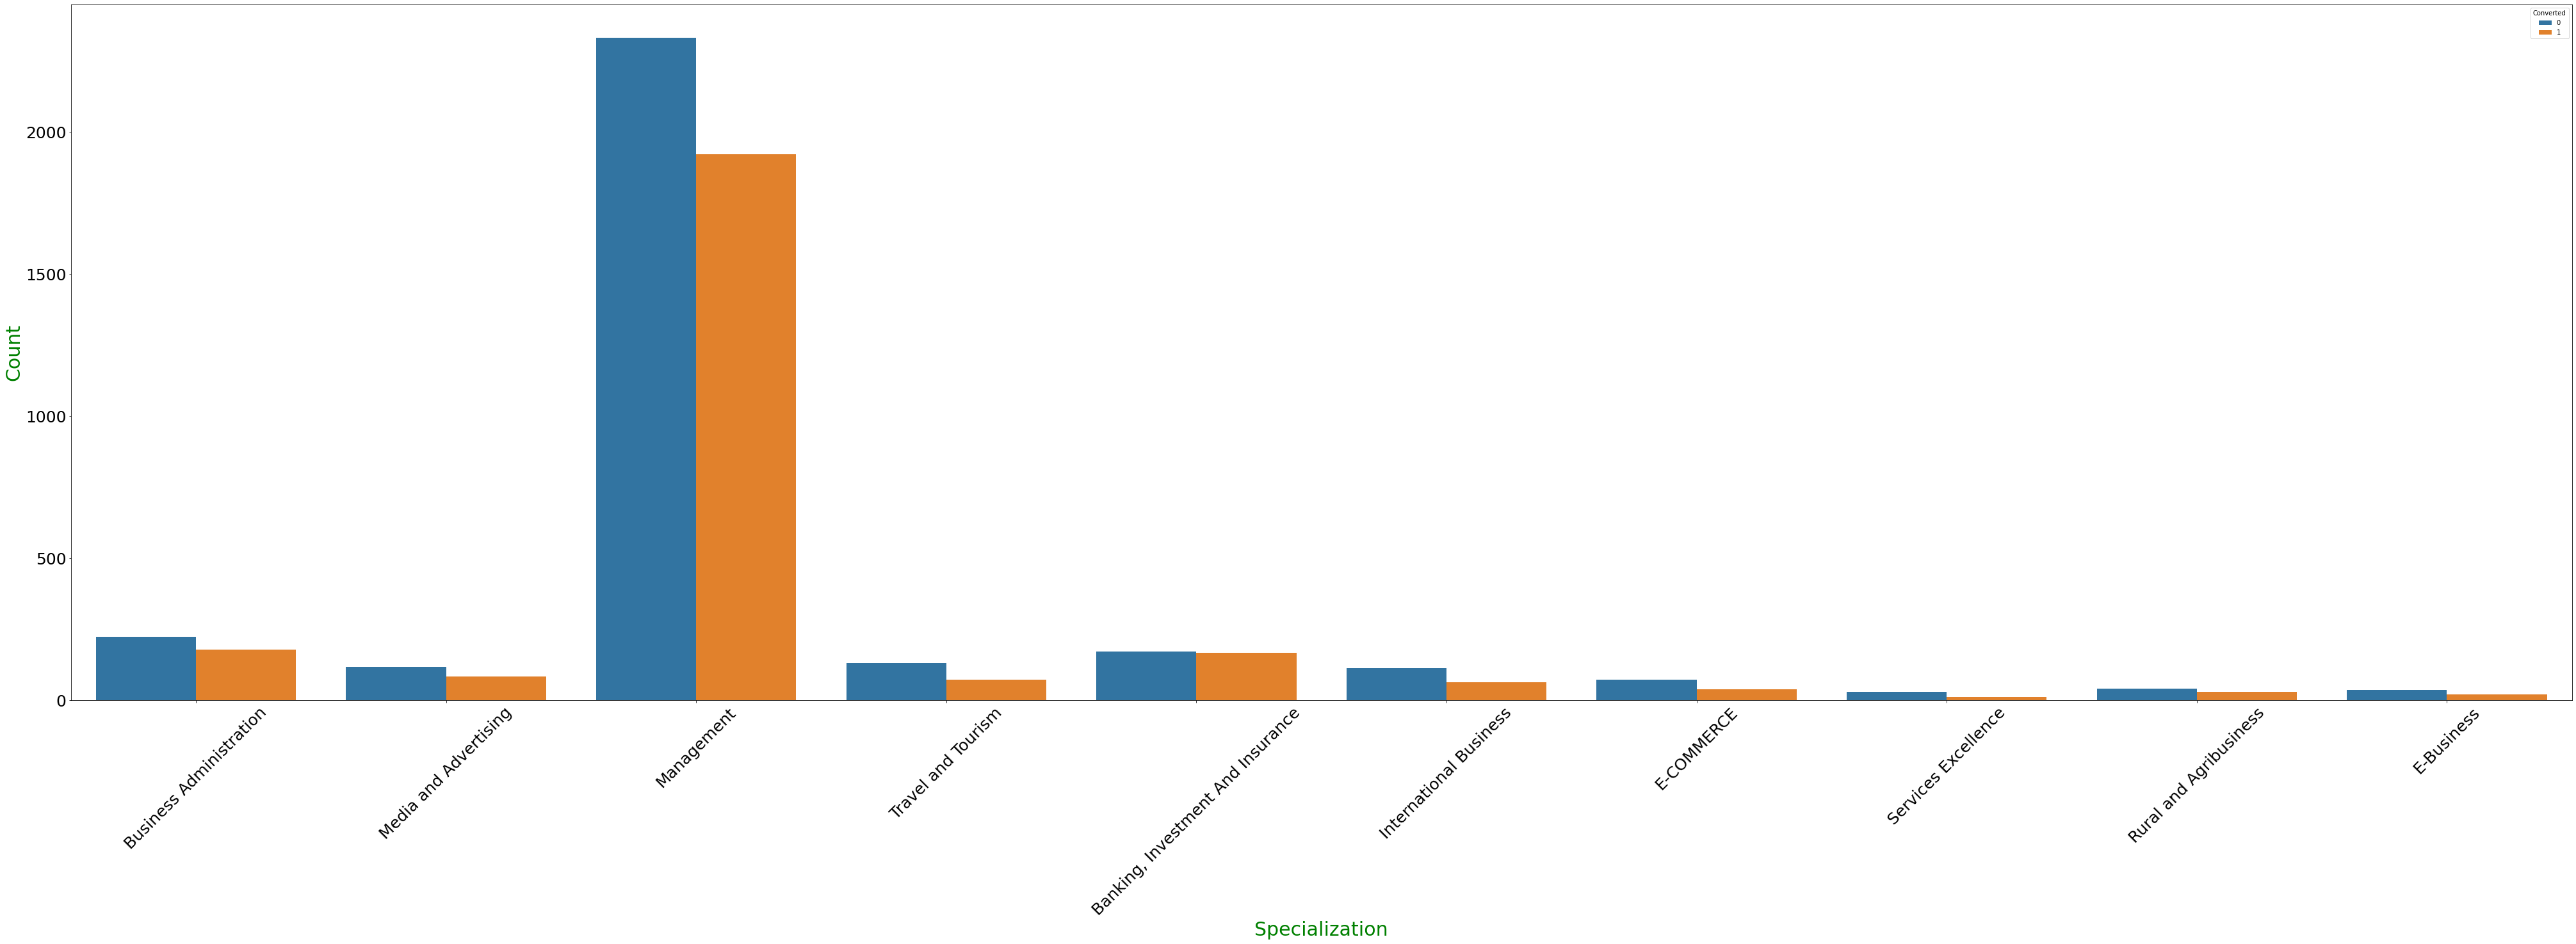

In [56]:
plt.figure(figsize=(70,20))
sns.countplot(x='Specialization', data=selected_specialization, hue='Converted')
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.xlabel('Specialization',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [57]:
selected_specialization.groupby(['Specialization','Converted']).size().unstack(fill_value=0)

Converted,0,1
Specialization,,
"Banking, Investment And Insurance",171,167
Business Administration,224,179
E-Business,36,21
E-COMMERCE,72,40
International Business,114,64
Management,2331,1922
Media and Advertising,118,85
Rural and Agribusiness,42,31
Services Excellence,29,11


In [58]:
selected_specialization.shape

(9240, 28)

In [59]:
selected_specialization['Specialization'].mode()

0    Management
Name: Specialization, dtype: object

- we can either work with this reformatted dataframe selected_specialization or we can impute this 'Specialization' attribute differently other than imputing by Mode because if we do so then as mode it will be selecting 'Management' and the distribution will be skewed again.

- We can assume that whole missing values from this attribute can be divided equally among all other categories of this attribute. 

- Or we can rename this group of Null values in this attribute to something else and tat group will be used in furthe modeling.

- Here we are choosing this third way of imputation

In [60]:
data_copy['Specialization'] = data_copy['Specialization'].replace(np.nan, 'Not Mentioned')

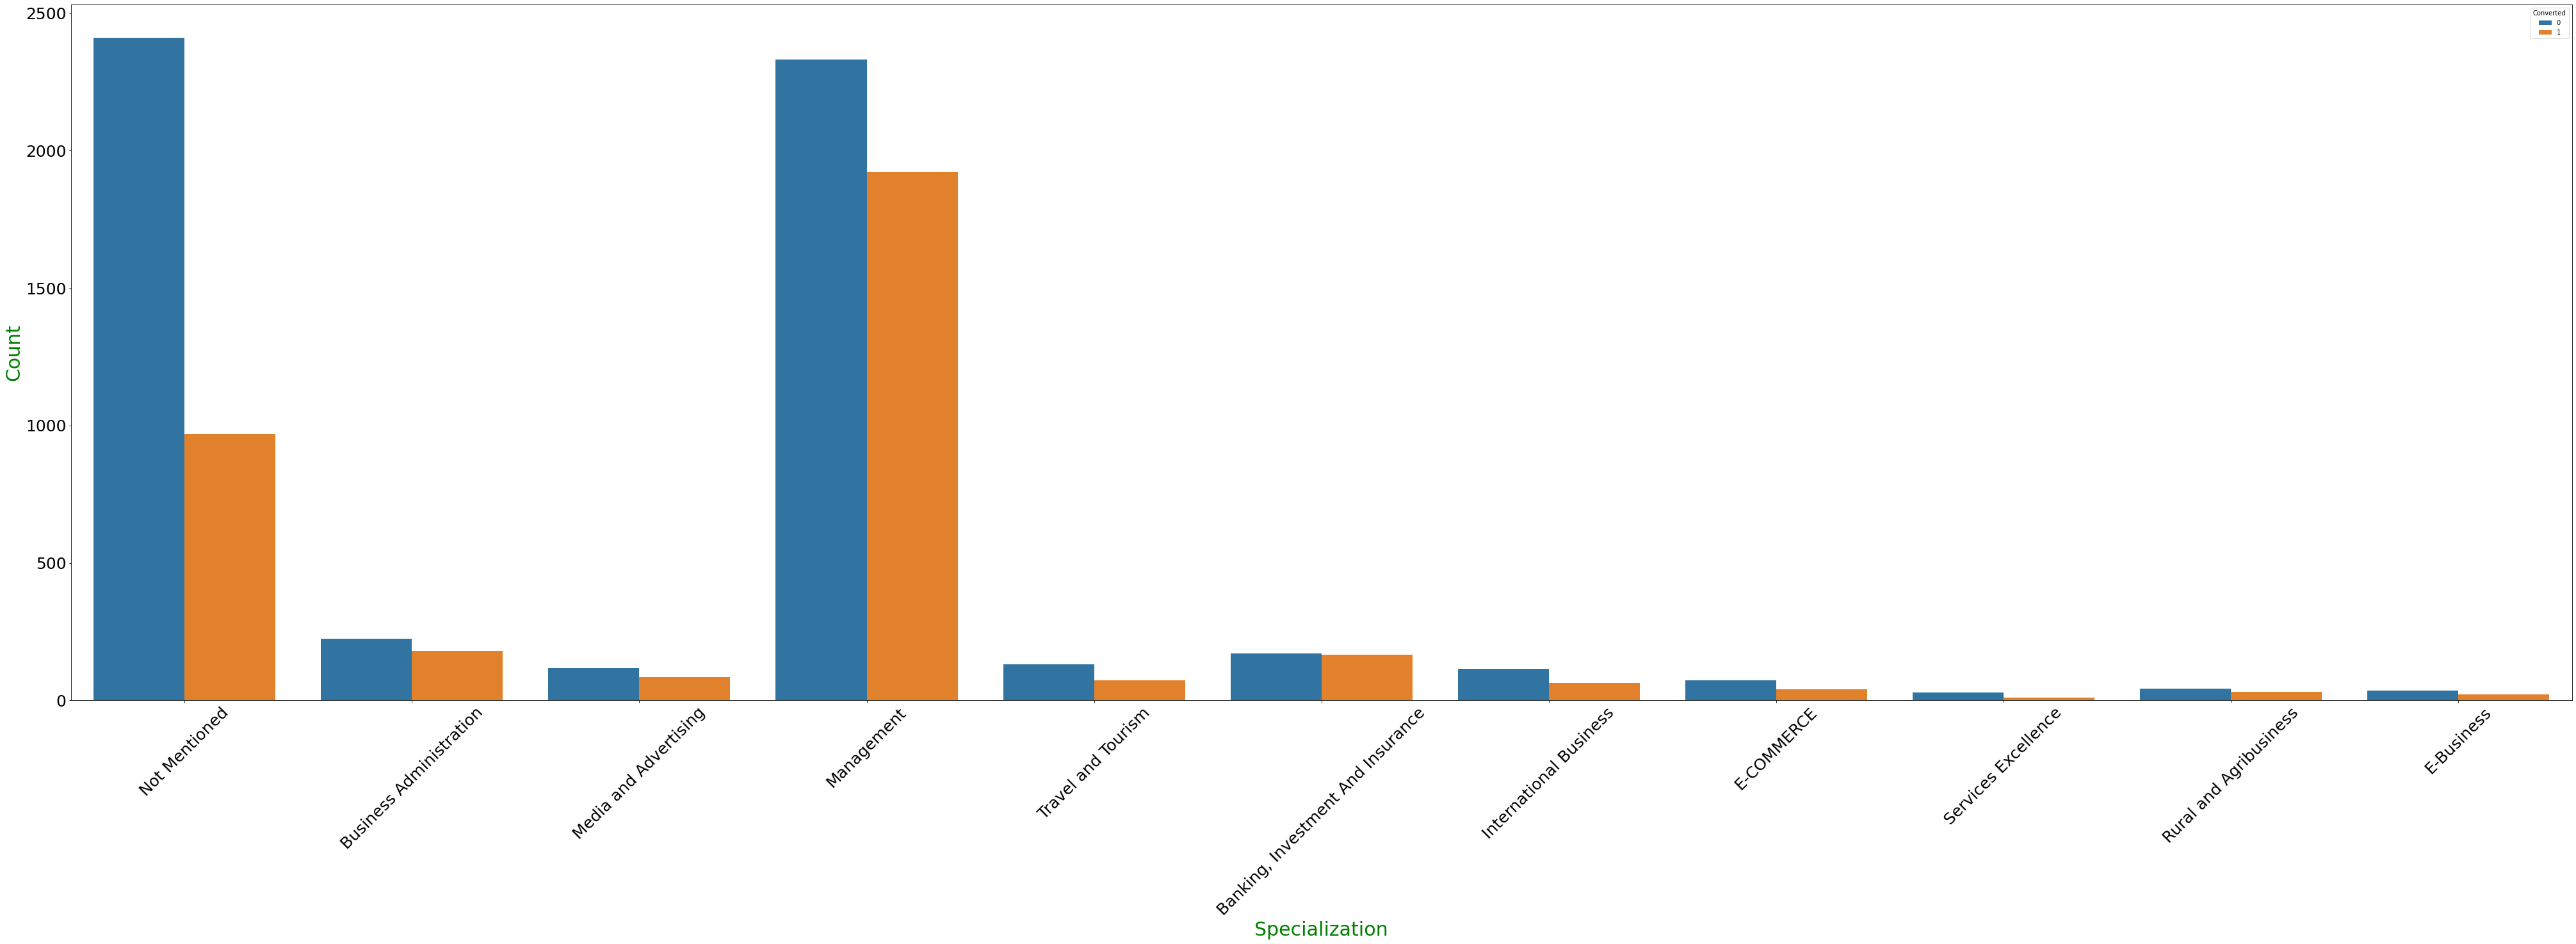

In [61]:
plt.figure(figsize=(70,20))
sns.countplot(x='Specialization', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.xlabel('Specialization',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [62]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.389610
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           1.482684
Total_Time_Spent                      0.000000
Page Views Per Visit                  1.482684
Last Activity                         1.114719
Country                              26.634199
Specialization                        0.000000
Current_Occupation                   29.112554
Motivation                           29.318182
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags         

<span style="color:darkred; font-weight:bold"> "Country" Attribute</span>

In [63]:
data_copy['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [64]:
data_copy.groupby(['Country','Converted']).size().unstack(fill_value=0)

Converted,0,1
Country,,
Asia/Pacific Region,1,1
Australia,10,3
Bahrain,3,4
Bangladesh,1,1
Belgium,2,0
Canada,4,0
China,2,0
Denmark,0,1
France,3,3


- As we can see here India has the highest number of leads in terms of convertion and non-convertion. Undoubtedly we can say it will have a eavily skewed distribution. We can either remove this column or else we can impute the null values using the mode value of this attribute which is 'India'
- This attribute has almost 27% null values.

In [65]:
data_copy['Country'].mode()[0]

'India'

In [66]:
data_copy.Country.replace(np.nan, data_copy['Country'].mode()[0], inplace=True)

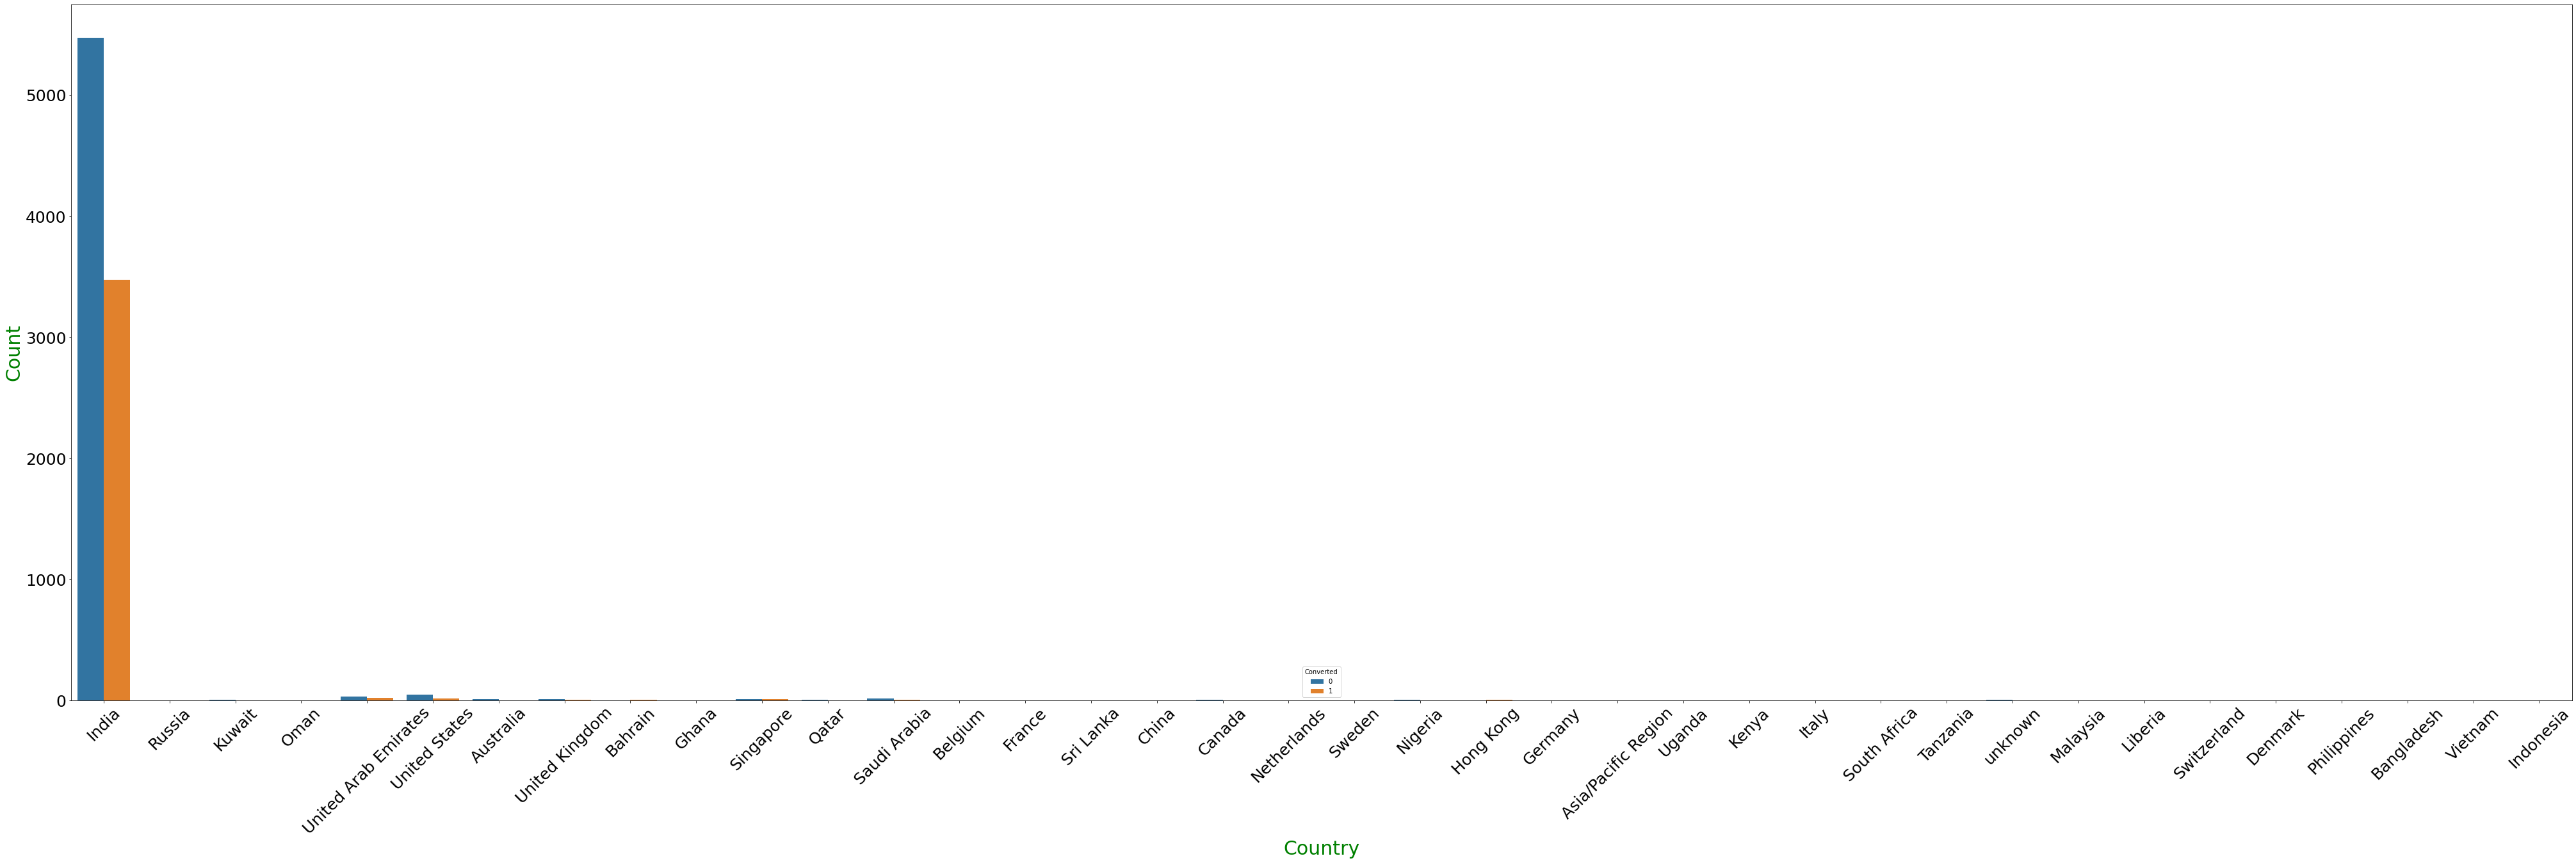

In [67]:
plt.figure(figsize=(70,20))
sns.countplot(x='Country', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.xlabel('Country',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

- The attribute sows highly skewness. we can drop this column too. 

In [68]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.389610
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           1.482684
Total_Time_Spent                      0.000000
Page Views Per Visit                  1.482684
Last Activity                         1.114719
Country                               0.000000
Specialization                        0.000000
Current_Occupation                   29.112554
Motivation                           29.318182
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags         

In [69]:
data_copy.drop(['Country'],axis=1, inplace=True)

- Imputing the Numerical Columns' null values using median because imputing by mean can mislead to erroneous result as mean is impacted by outliers.

In [70]:
data_copy['TotalVisits'] = data_copy['TotalVisits'].replace(np.nan, data_copy['TotalVisits'].median())
data_copy['Page Views Per Visit'] = data_copy['Page Views Per Visit'].replace(np.nan, data_copy['Page Views Per Visit'].median())

In [71]:
data_copy.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current_Occupation', 'Motivation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Get_update', 'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City', 'Payment_Mode',
       'Free_Interview_Copy', 'Last Notable Activity'],
      dtype='object')

In [72]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.389610
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           0.000000
Total_Time_Spent                      0.000000
Page Views Per Visit                  0.000000
Last Activity                         1.114719
Specialization                        0.000000
Current_Occupation                   29.112554
Motivation                           29.318182
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags                                 36.287879
Update me on 

 <span style="color:darkred; font-weight:bold"> "Lead Source" Attribute</span>

In [73]:
data_copy['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [74]:
data_copy['Lead Source'].isna().sum()

36

In [75]:
data_copy[data_copy['Lead Source'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
836,Lead Add Form,NaN,Yes,No,1,3.0,1378,2.0,Email Bounced,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
1569,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,SMS Sent
1746,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
2020,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,SMS Sent
2025,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,SMS Sent
2152,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,SMS Sent
2346,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,SMS Sent
2544,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,Not Mentioned,...,No,No,No,number not provided,No,No,NaN,No,No,Email Opened
2601,Quick Add Form,NaN,Yes,No,1,3.0,2217,2.0,Email Bounced,E-COMMERCE,...,No,No,No,NaN,No,No,Other Metro Cities,No,No,Modified
2676,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Management,...,No,No,No,Will revert after reading the email,No,No,Other Cities of Maharashtra,No,No,SMS Sent


In [76]:
data_copy.shape

(9240, 27)

In [77]:
data_copy.dropna(subset=['Lead Source'], inplace=True)

In [78]:
data_copy.shape

(9204, 27)

In [79]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.000000
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           0.000000
Total_Time_Spent                      0.000000
Page Views Per Visit                  0.000000
Last Activity                         1.097349
Specialization                        0.000000
Current_Occupation                   29.226423
Motivation                           29.432855
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags                                 36.310300
Update me on 

In [80]:
data_copy.groupby(['Lead Source','Converted']).size().unstack(fill_value=0)

Converted,0,1
Lead Source,,
Click2call,1,3
Direct Traffic,1725,818
Facebook,42,13
Google,1721,1147
Live Chat,0,2
NC_EDM,0,1
Olark Chat,1307,448
Organic Search,718,436
Pay per Click Ads,1,0


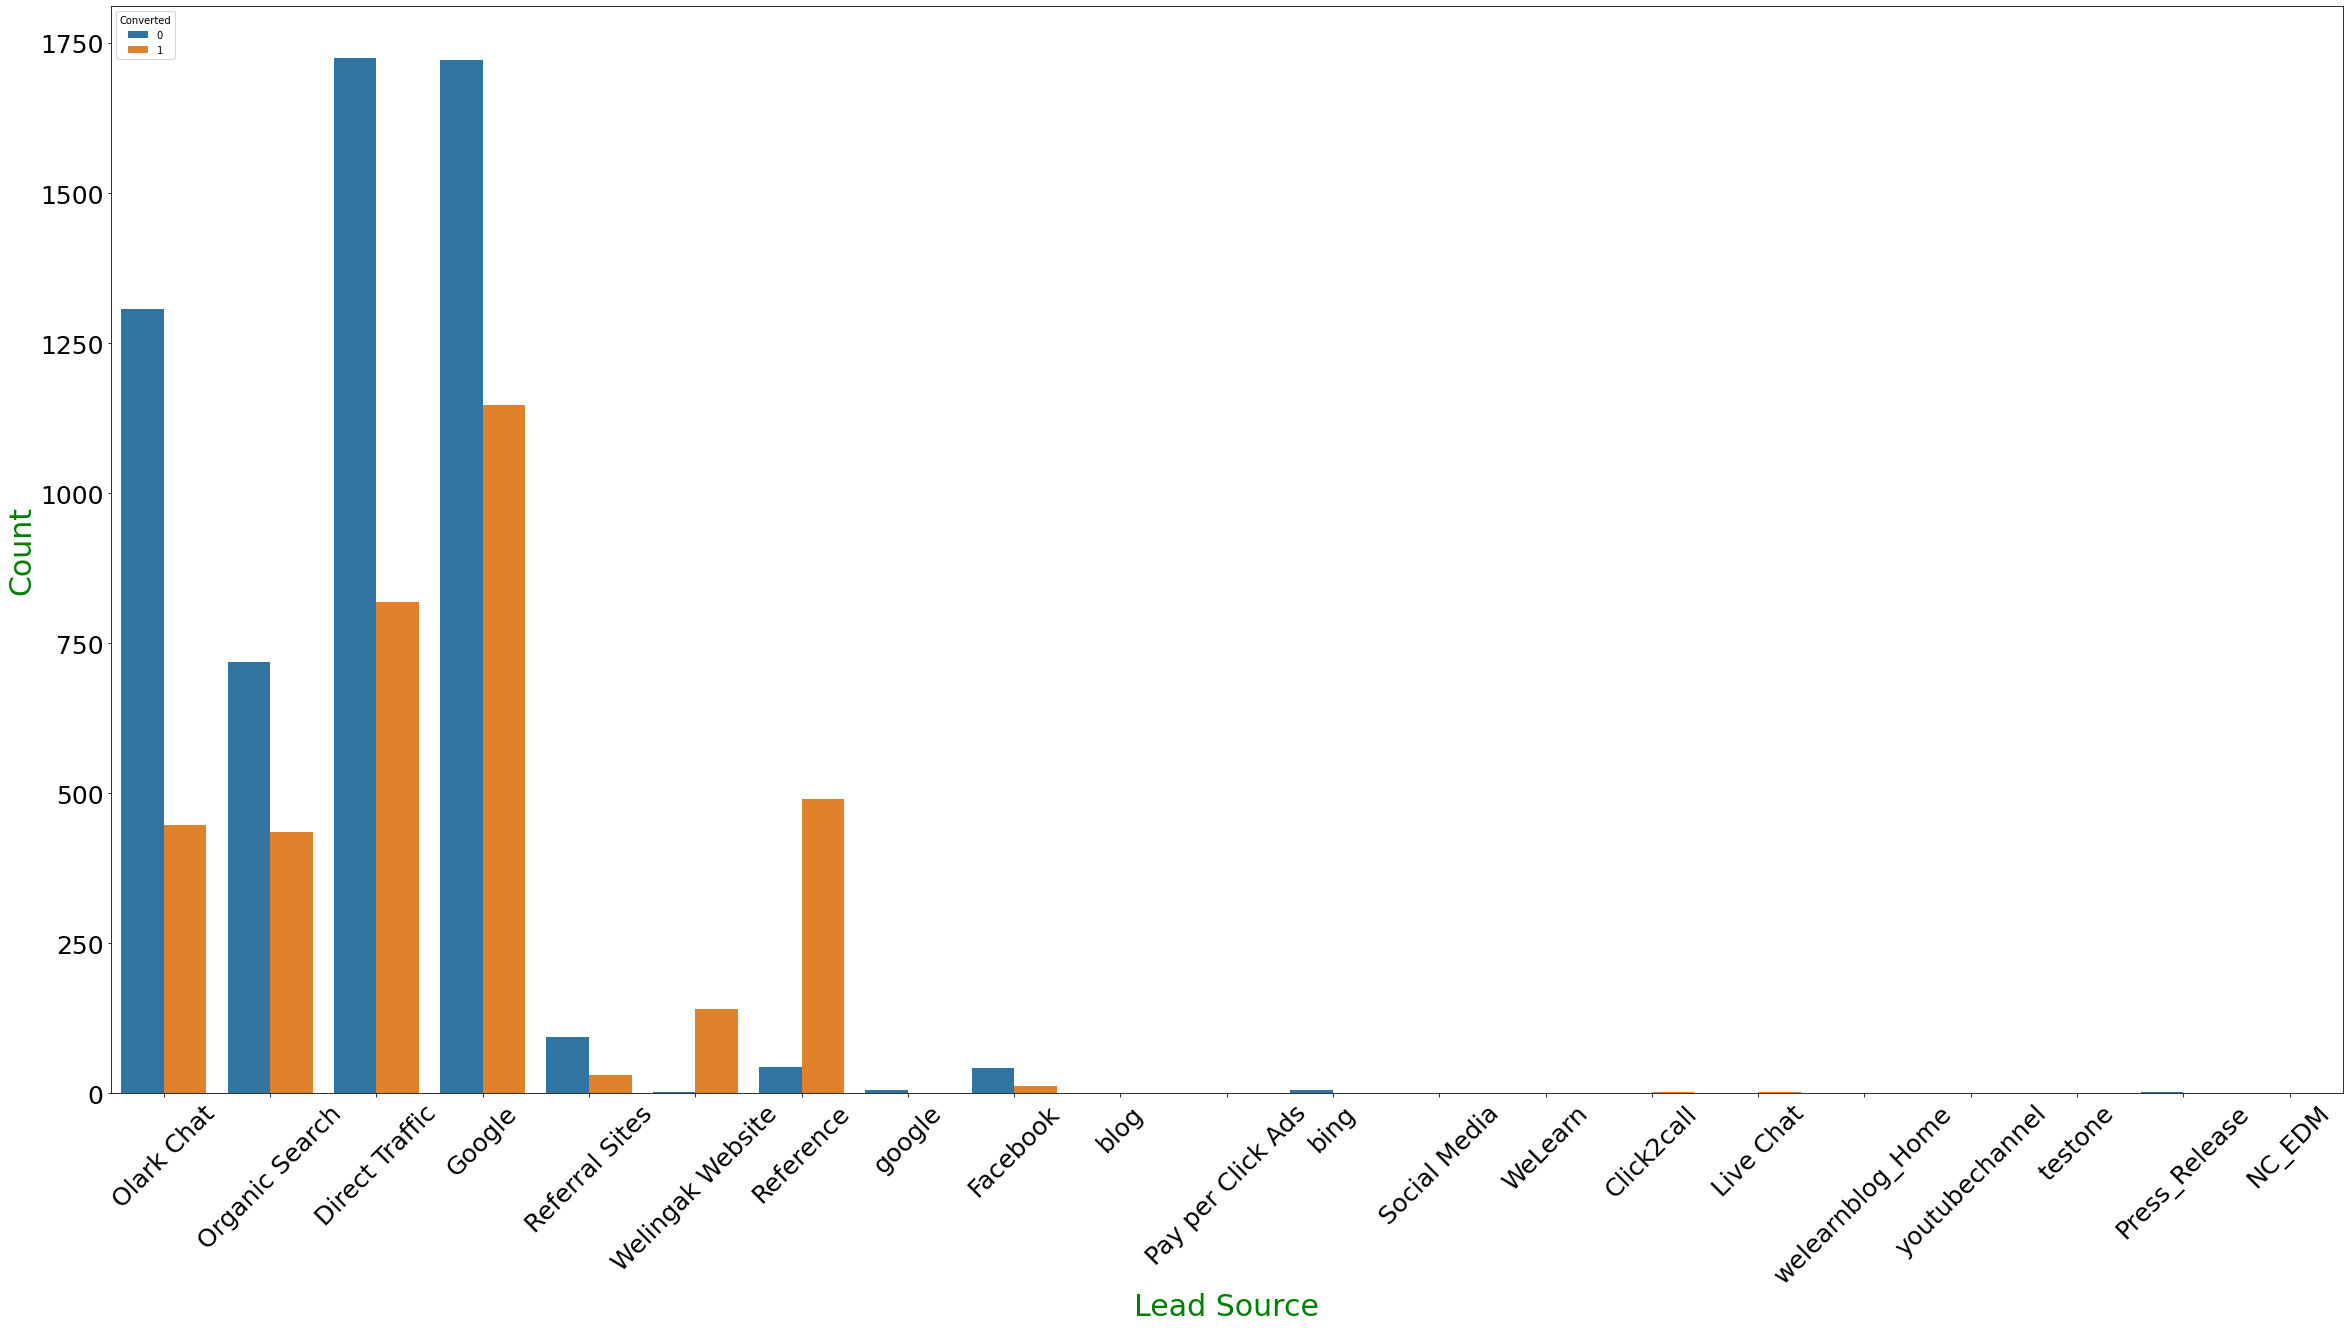

In [81]:
plt.figure(figsize=(40,20))
sns.countplot(x='Lead Source', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.xlabel('Lead Source',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

- We can see that maximum leads have come from 'Olar Chat', 'Organic Search', 'Direct Traffic' and 'Google'. Very few from 'Referral Sites','Welingak Website','Reference' and 'Facebook'. Rest are bery negligible.
- we can notice here 'Google' and 'google' - these same things are present but with different spellings. So we can convert these into same.
- Reference and Welingak Website - these two sources have higher convertion chance

In [82]:
data_copy['Lead Source'].replace('google','Google', inplace=True)

In [83]:
data_copy.groupby(['Lead Source','Converted']).size().unstack(fill_value=0)

Converted,0,1
Lead Source,,
Click2call,1,3
Direct Traffic,1725,818
Facebook,42,13
Google,1726,1147
Live Chat,0,2
NC_EDM,0,1
Olark Chat,1307,448
Organic Search,718,436
Pay per Click Ads,1,0


In [85]:
# data_copy['Lead Source'] in ['blog','testone','welearnblog_Home','youtubechannel']

selected_values = ['blog', 'testone', 'welearnblog_Home', 'youtubechannel']

filtered_data = data_copy[data_copy['Lead Source'].isin(selected_values)]

In [86]:
filtered_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
926,Landing Page Submission,blog,No,No,0,4.0,677,4.0,Email Opened,Business Administration,...,No,No,No,NaN,No,No,NaN,No,No,Email Opened
2876,Landing Page Submission,welearnblog_Home,No,No,0,2.0,368,2.0,Email Opened,Management,...,No,No,No,NaN,No,No,Other Cities of Maharashtra,No,No,Email Opened
3626,Landing Page Submission,youtubechannel,Yes,No,0,4.0,487,2.0,Unsubscribed,Business Administration,...,No,No,No,NaN,No,No,NaN,No,No,Unsubscribed
5241,Landing Page Submission,testone,No,No,0,5.0,304,2.5,Page Visited on Website,Management,...,No,No,No,Not doing further education,No,No,Thane & Outskirts,No,No,Page Visited on Website


In [87]:
data_copy.drop(filtered_data.index, inplace=True)

In [88]:
data_copy.shape

(9200, 27)

In [89]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.000000
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           0.000000
Total_Time_Spent                      0.000000
Page Views Per Visit                  0.000000
Last Activity                         1.097826
Specialization                        0.000000
Current_Occupation                   29.206522
Motivation                           29.413043
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags                                 36.293478
Update me on 

 <span style="color:darkred; font-weight:bold"> "Last Activity" Attribute</span>

In [90]:
data_copy['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [91]:
data_copy[data_copy['Last Activity'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
77,Lead Add Form,Welingak Website,No,No,1,3.0,1096,2.0,NaN,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
79,Lead Add Form,Reference,No,No,1,3.0,705,2.0,NaN,Management,...,No,No,No,Will revert after reading the email,No,No,Thane & Outskirts,No,No,Modified
81,Lead Add Form,Welingak Website,No,No,1,3.0,346,2.0,NaN,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
88,Lead Add Form,Reference,No,No,1,3.0,1007,2.0,NaN,Management,...,No,No,No,Closed by Horizzon,No,No,Mumbai,No,No,Modified
120,Lead Add Form,Reference,No,No,1,3.0,1111,2.0,NaN,Management,...,No,No,No,Closed by Horizzon,No,No,Other Cities,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,No,No,0,3.0,1201,2.0,NaN,Management,...,No,No,No,Interested in full time MBA,No,No,NaN,No,No,Modified
8107,Lead Add Form,Reference,No,No,1,3.0,903,2.0,NaN,"Banking, Investment And Insurance",...,No,No,No,Lost to EINS,No,No,NaN,No,No,Modified
8434,Lead Add Form,Reference,No,No,1,3.0,1458,2.0,NaN,Not Mentioned,...,No,No,No,Closed by Horizzon,No,No,NaN,No,No,Modified
9015,Lead Add Form,Reference,No,No,1,3.0,1159,2.0,NaN,Management,...,No,No,No,Closed by Horizzon,No,No,Mumbai,No,No,Modified


In [92]:
data_copy['Last Activity'].mode()[0]

'Email Opened'

In [93]:
data_copy.groupby(['Last Activity','Converted']).size().unstack()

Converted,0,1
Last Activity,,
Approached upfront,NaN,9.0
Converted to Lead,374.0,54.0
Email Bounced,297.0,24.0
Email Link Clicked,194.0,73.0
Email Marked Spam,NaN,2.0
Email Opened,2180.0,1250.0
Email Received,NaN,2.0
Form Submitted on Website,88.0,28.0
Had a Phone Conversation,8.0,22.0


- As there are only 1.09% Null values present in this attribute , so we can drop those instances which carry these null values.

In [94]:
data_copy.dropna(subset=['Last Activity'], inplace=True)

In [95]:
data_copy.shape

(9099, 27)

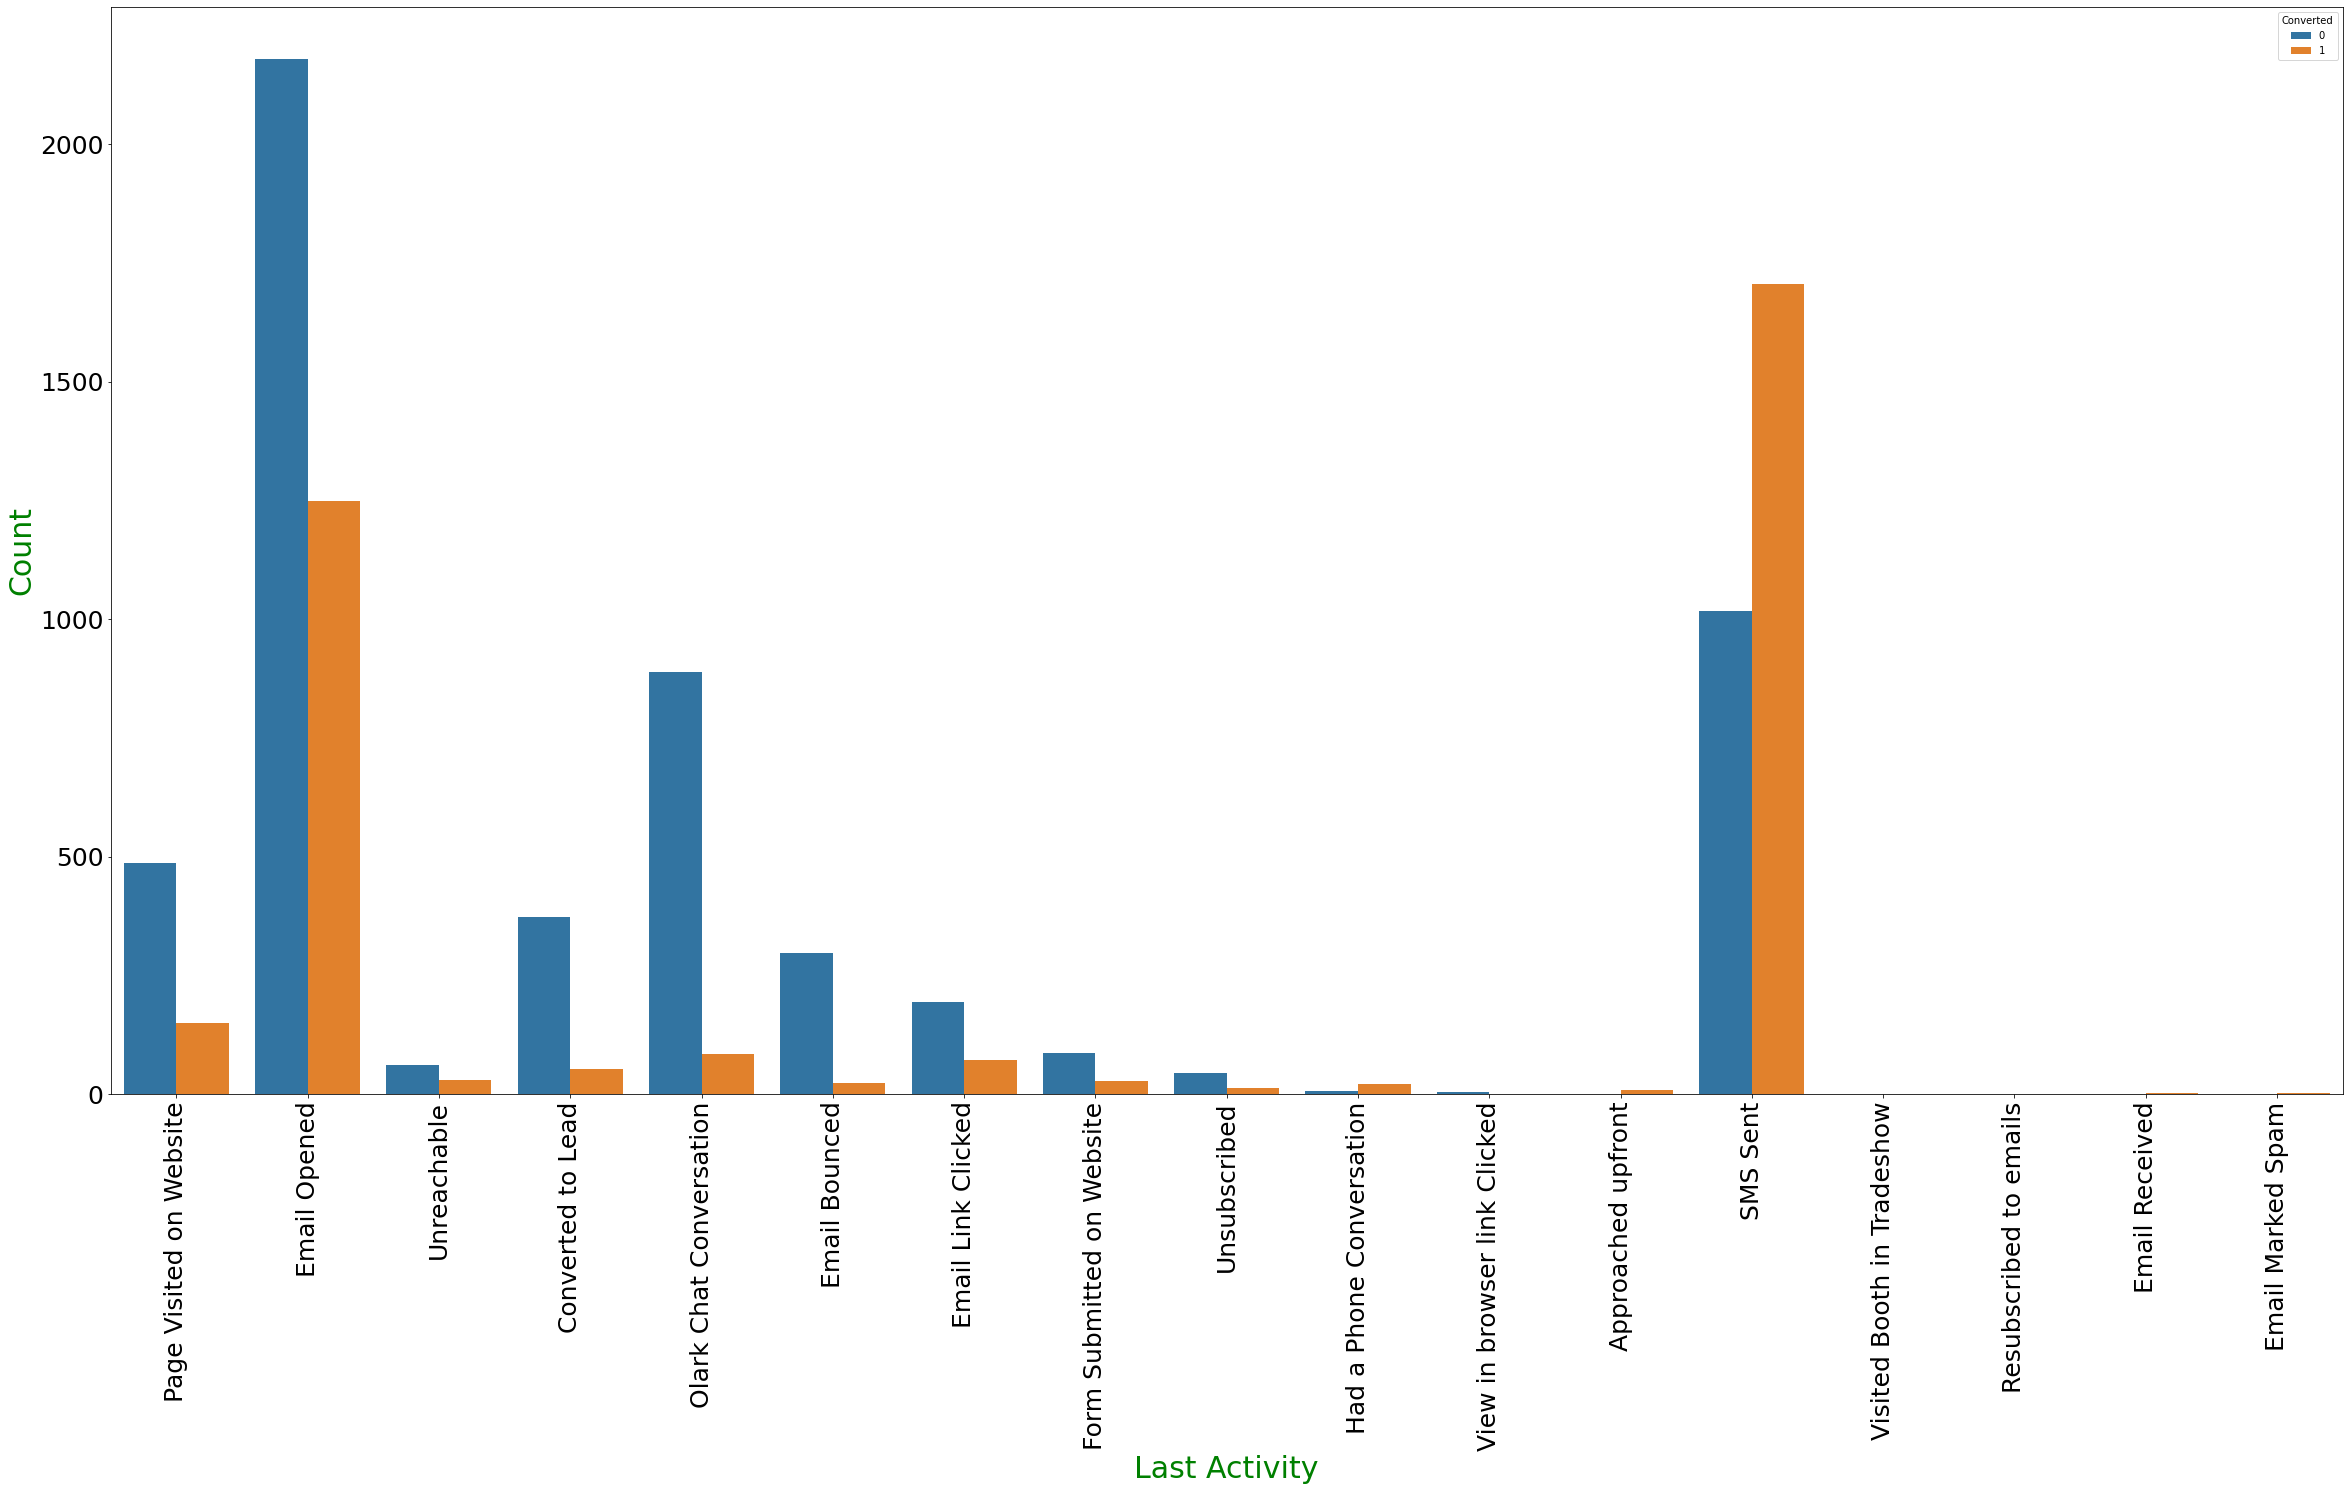

In [96]:
plt.figure(figsize=(40,20))
sns.countplot(x='Last Activity', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Last Activity',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

- From the graph we can see that few categories have complete negligible count for leads irrespective of being converted or non-converted. So those instances can also be dropped 

In [97]:
selected_values_Last_Activity = ['Visited Booth in Tradeshow', 'Email Received', 'Resubscribed to emails', 'Email Marked Spam']

filtered_data_Last_Activity = data_copy[data_copy['Last Activity'].isin(selected_values_Last_Activity)]

In [98]:
filtered_data_Last_Activity

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
931,Landing Page Submission,Google,No,No,0,4.0,137,4.00,Visited Booth in Tradeshow,Management,...,No,No,No,wrong number given,No,No,Mumbai,No,No,Modified
3068,API,Olark Chat,No,No,1,0.0,0,0.00,Resubscribed to emails,Not Mentioned,...,No,No,No,Lost to EINS,No,No,NaN,No,No,Resubscribed to emails
7851,Landing Page Submission,Google,No,No,1,5.0,1255,2.50,Email Received,Management,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
7959,Landing Page Submission,Google,No,No,1,6.0,761,3.00,Email Received,Management,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Received
8110,Lead Add Form,Reference,Yes,No,1,0.0,0,0.00,Email Marked Spam,Management,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,Email Marked Spam
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Management,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam


In [99]:
data_copy.drop(filtered_data_Last_Activity.index, inplace=True)

In [100]:
data_copy.shape

(9093, 27)

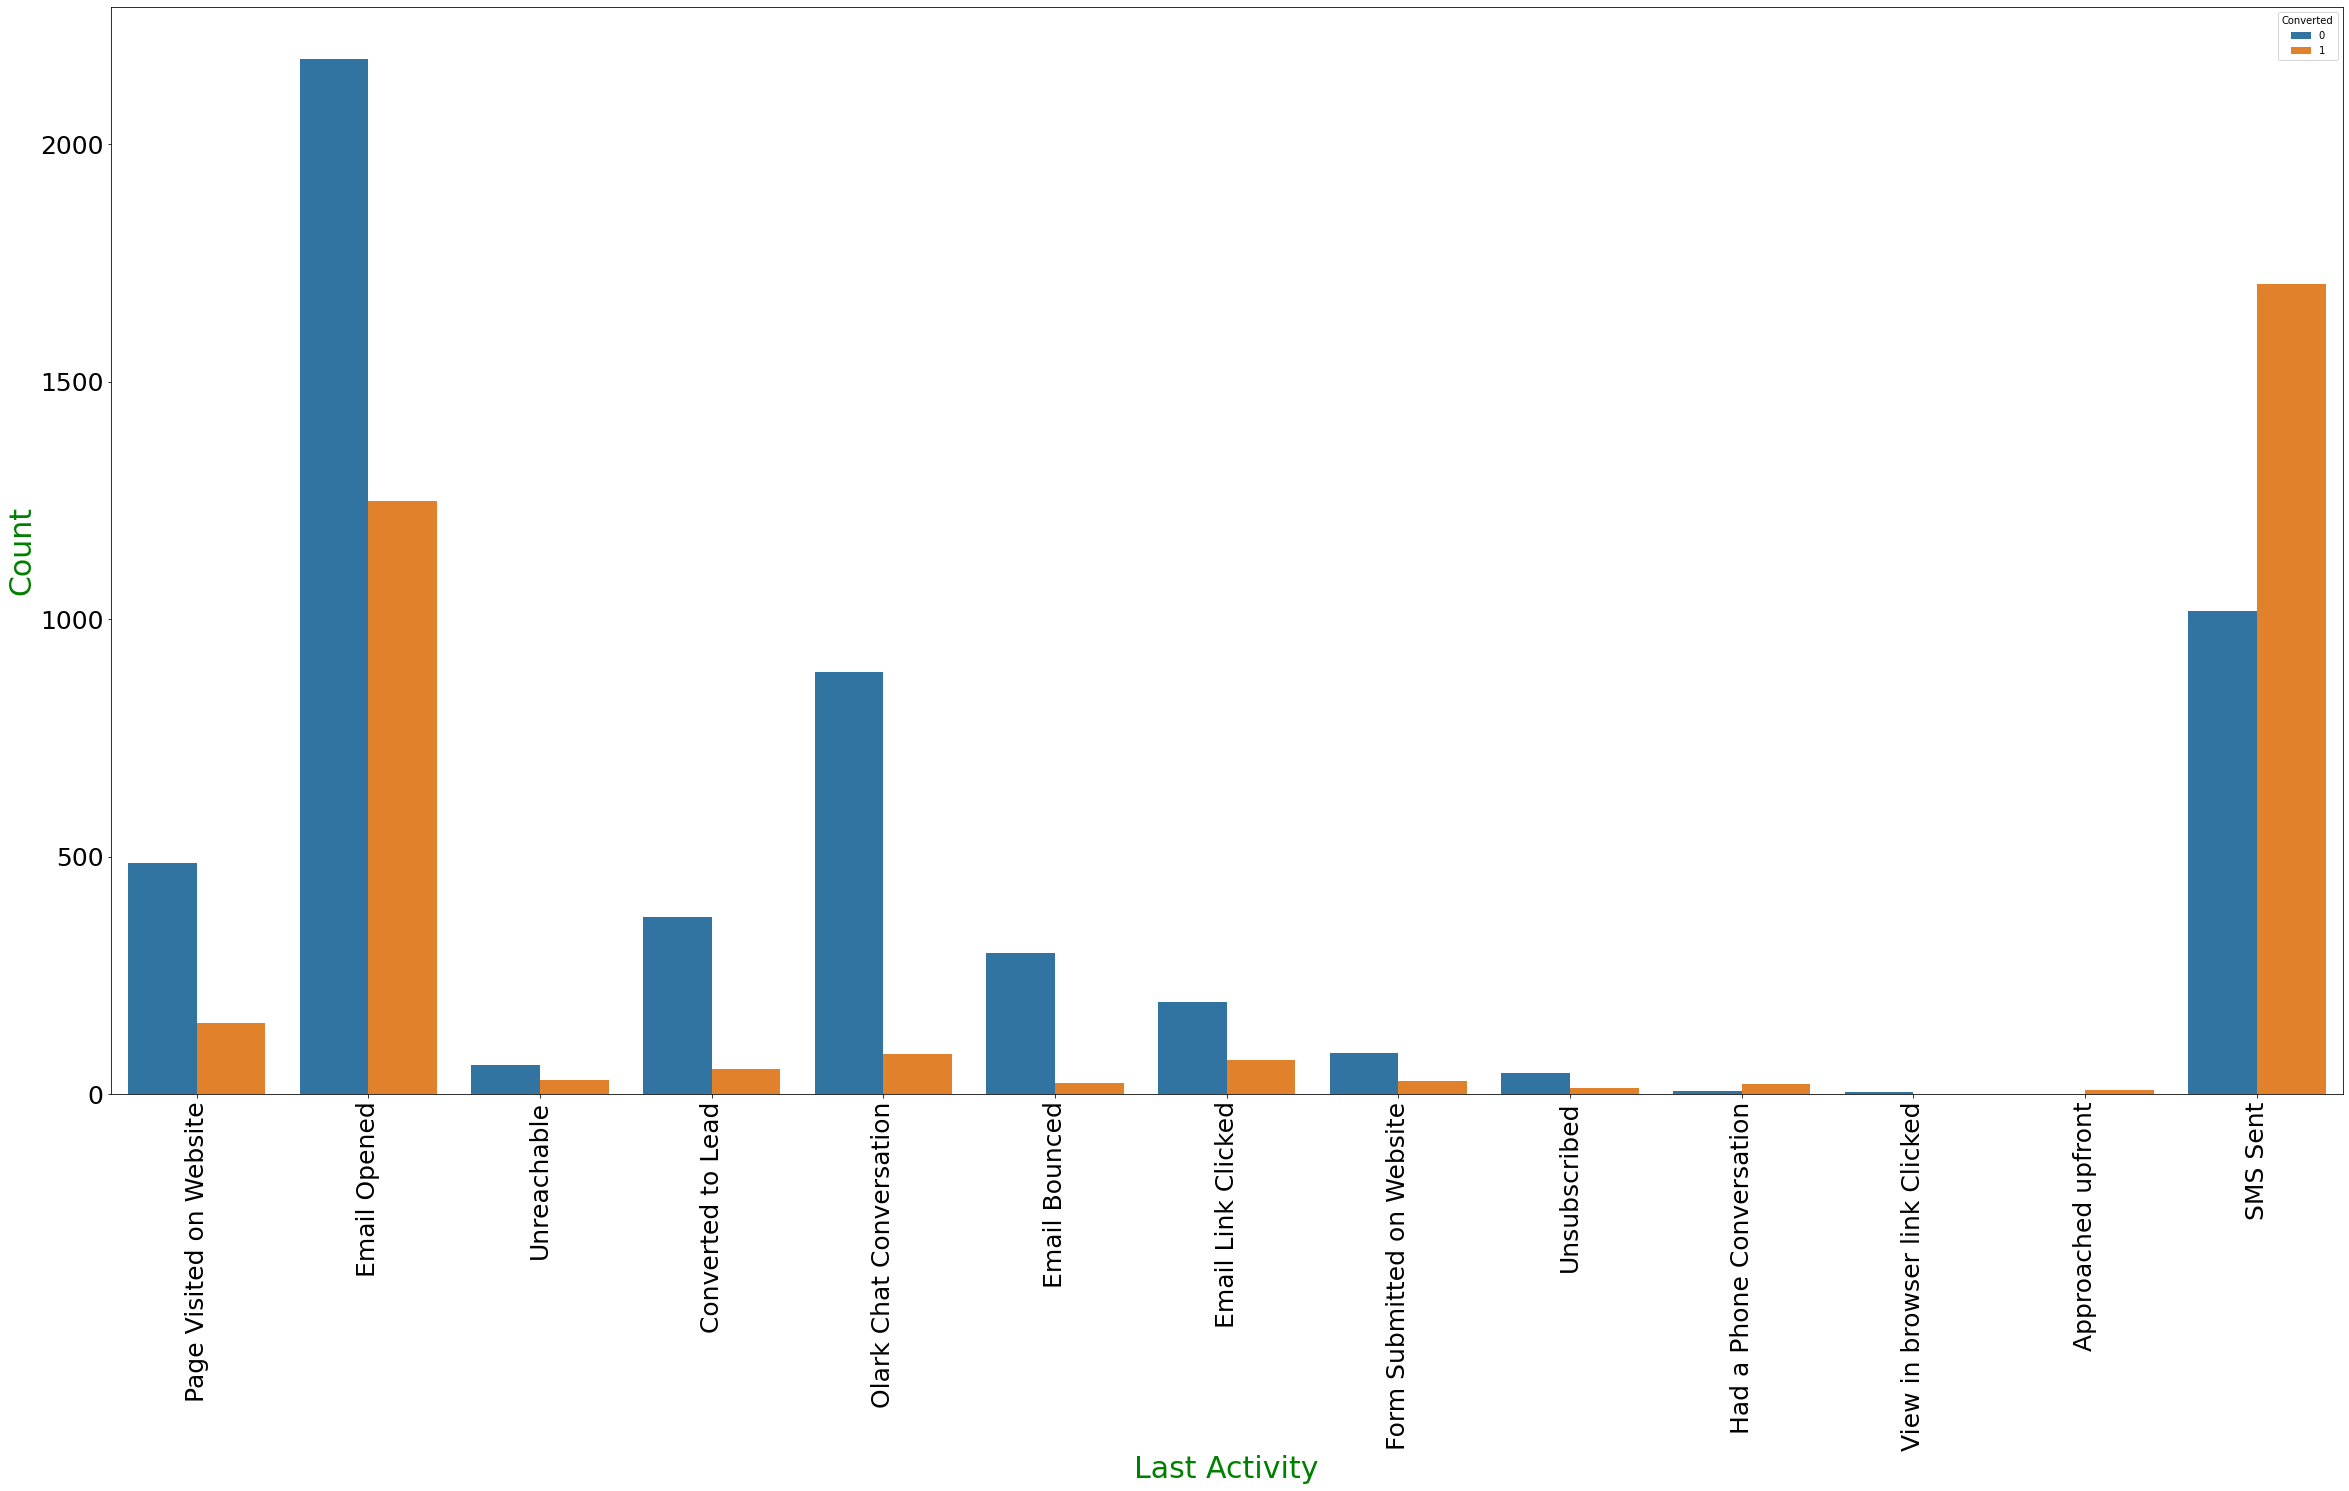

In [101]:
plt.figure(figsize=(40,20))
sns.countplot(x='Last Activity', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Last Activity',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [102]:
Last_Activity_Browser = ['View in browser link Clicked','Approached upfront']

filtered_data_Last_Activity = data_copy[data_copy['Last Activity'].isin(Last_Activity_Browser)]
data_copy.drop(filtered_data_Last_Activity.index, inplace=True)

In [103]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.000000
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           0.000000
Total_Time_Spent                      0.000000
Page Views Per Visit                  0.000000
Last Activity                         0.000000
Specialization                        0.000000
Current_Occupation                   29.576999
Motivation                           29.775281
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags                                 36.660057
Update me on 

 <span style="color:darkred; font-weight:bold"> "Current Occupation" Attribute</span>

In [104]:
data_copy['Current_Occupation'].value_counts()

Unemployed              5475
Working Professional     680
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: Current_Occupation, dtype: int64

In [105]:
data_copy[data_copy['Current_Occupation'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,Management,...,No,No,No,NaN,No,No,Thane & Outskirts,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,Management,...,No,No,No,NaN,No,No,Mumbai,No,No,Email Opened
16,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,Landing Page Submission,Direct Traffic,Yes,No,0,5.0,234,2.5,Page Visited on Website,E-COMMERCE,...,No,No,No,NaN,No,No,Mumbai,No,No,Modified
9214,API,Organic Search,No,No,1,2.0,881,2.0,SMS Sent,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,SMS Sent
9215,Landing Page Submission,Organic Search,No,No,0,8.0,397,8.0,Email Opened,Business Administration,...,No,No,No,NaN,No,No,Thane & Outskirts,No,Yes,Email Opened
9218,Landing Page Submission,Google,Yes,No,0,1.0,149,1.0,Email Bounced,Management,...,No,No,No,NaN,No,No,Mumbai,No,No,Modified


In [106]:
data_copy['Current_Occupation'].replace(np.nan, 'Not Mentioned', inplace=True)

In [107]:
data_copy['Current_Occupation'].value_counts()

Unemployed              5475
Not Mentioned           2685
Working Professional     680
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: Current_Occupation, dtype: int64

In [108]:
data_copy.groupby(['Current_Occupation','Converted']).size().unstack()

Converted,0,1
Current_Occupation,,
Businessman,3.0,5.0
Housewife,NaN,9.0
Not Mentioned,2316.0,369.0
Other,6.0,9.0
Student,132.0,74.0
Unemployed,3128.0,2347.0
Working Professional,56.0,624.0


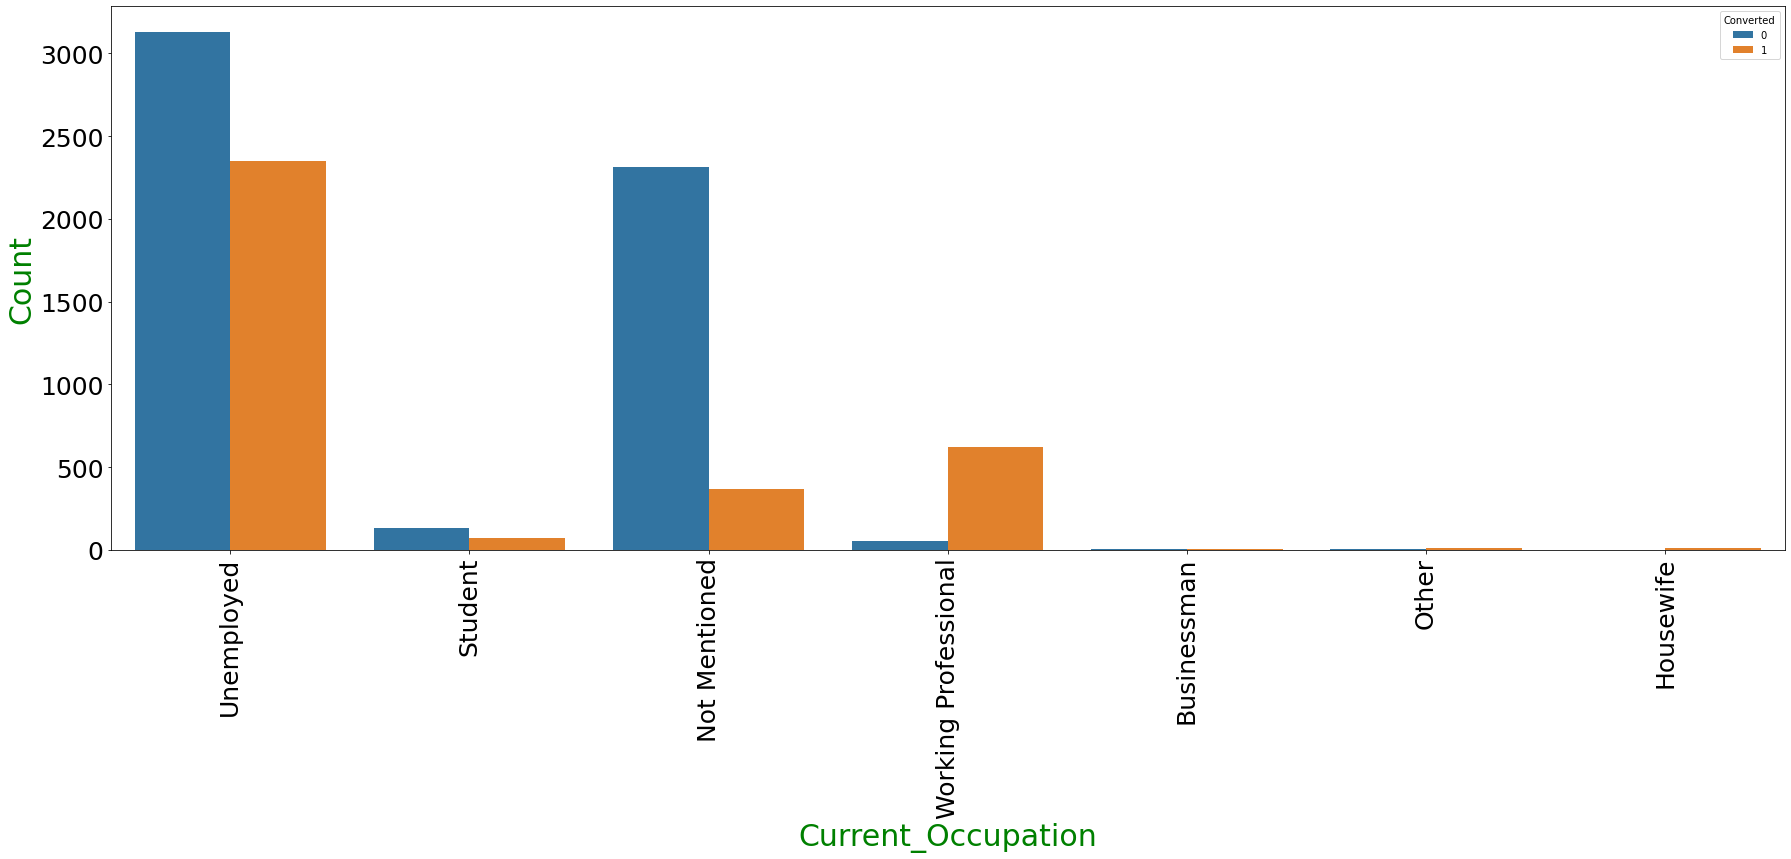

In [109]:
plt.figure(figsize=(30,10))
sns.countplot(x='Current_Occupation', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Current_Occupation',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [110]:
data_copy['Current_Occupation'].unique()

array(['Unemployed', 'Student', 'Not Mentioned', 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [111]:
data_copy['Current_Occupation'] = data_copy['Current_Occupation'].replace(['Businessman','Other','Housewife'],'Other')

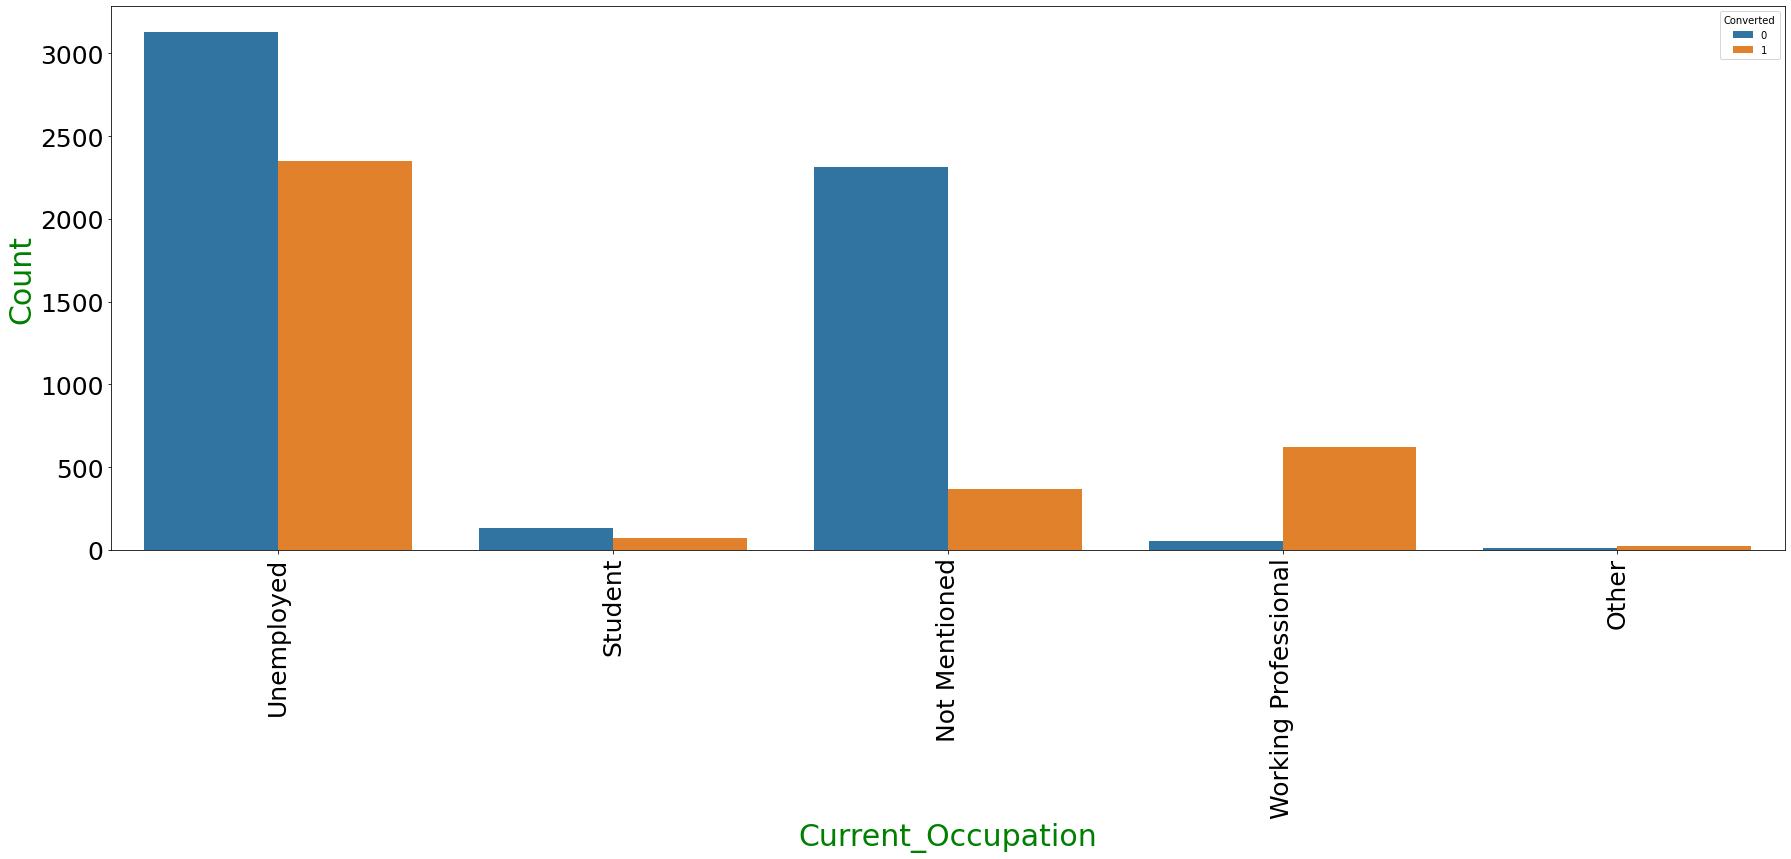

In [112]:
plt.figure(figsize=(30,10))
sns.countplot(x='Current_Occupation', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Current_Occupation',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

 <span style="color:darkred; font-weight:bold"> "Motivation" Attribute</span>

In [113]:
data_copy['Motivation'].value_counts()

Better Career Prospects      6373
Flexibility & Convenience       1
Other                           1
Name: Motivation, dtype: int64

In [114]:
data_copy['Motivation'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [115]:
data_copy[data_copy['Motivation'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,Management,...,No,No,No,NaN,No,No,Thane & Outskirts,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,Management,...,No,No,No,NaN,No,No,Mumbai,No,No,Email Opened
16,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,Landing Page Submission,Direct Traffic,Yes,No,0,5.0,234,2.5,Page Visited on Website,E-COMMERCE,...,No,No,No,NaN,No,No,Mumbai,No,No,Modified
9214,API,Organic Search,No,No,1,2.0,881,2.0,SMS Sent,Not Mentioned,...,No,No,No,NaN,No,No,NaN,No,No,SMS Sent
9215,Landing Page Submission,Organic Search,No,No,0,8.0,397,8.0,Email Opened,Business Administration,...,No,No,No,NaN,No,No,Thane & Outskirts,No,Yes,Email Opened
9218,Landing Page Submission,Google,Yes,No,0,1.0,149,1.0,Email Bounced,Management,...,No,No,No,NaN,No,No,Mumbai,No,No,Modified


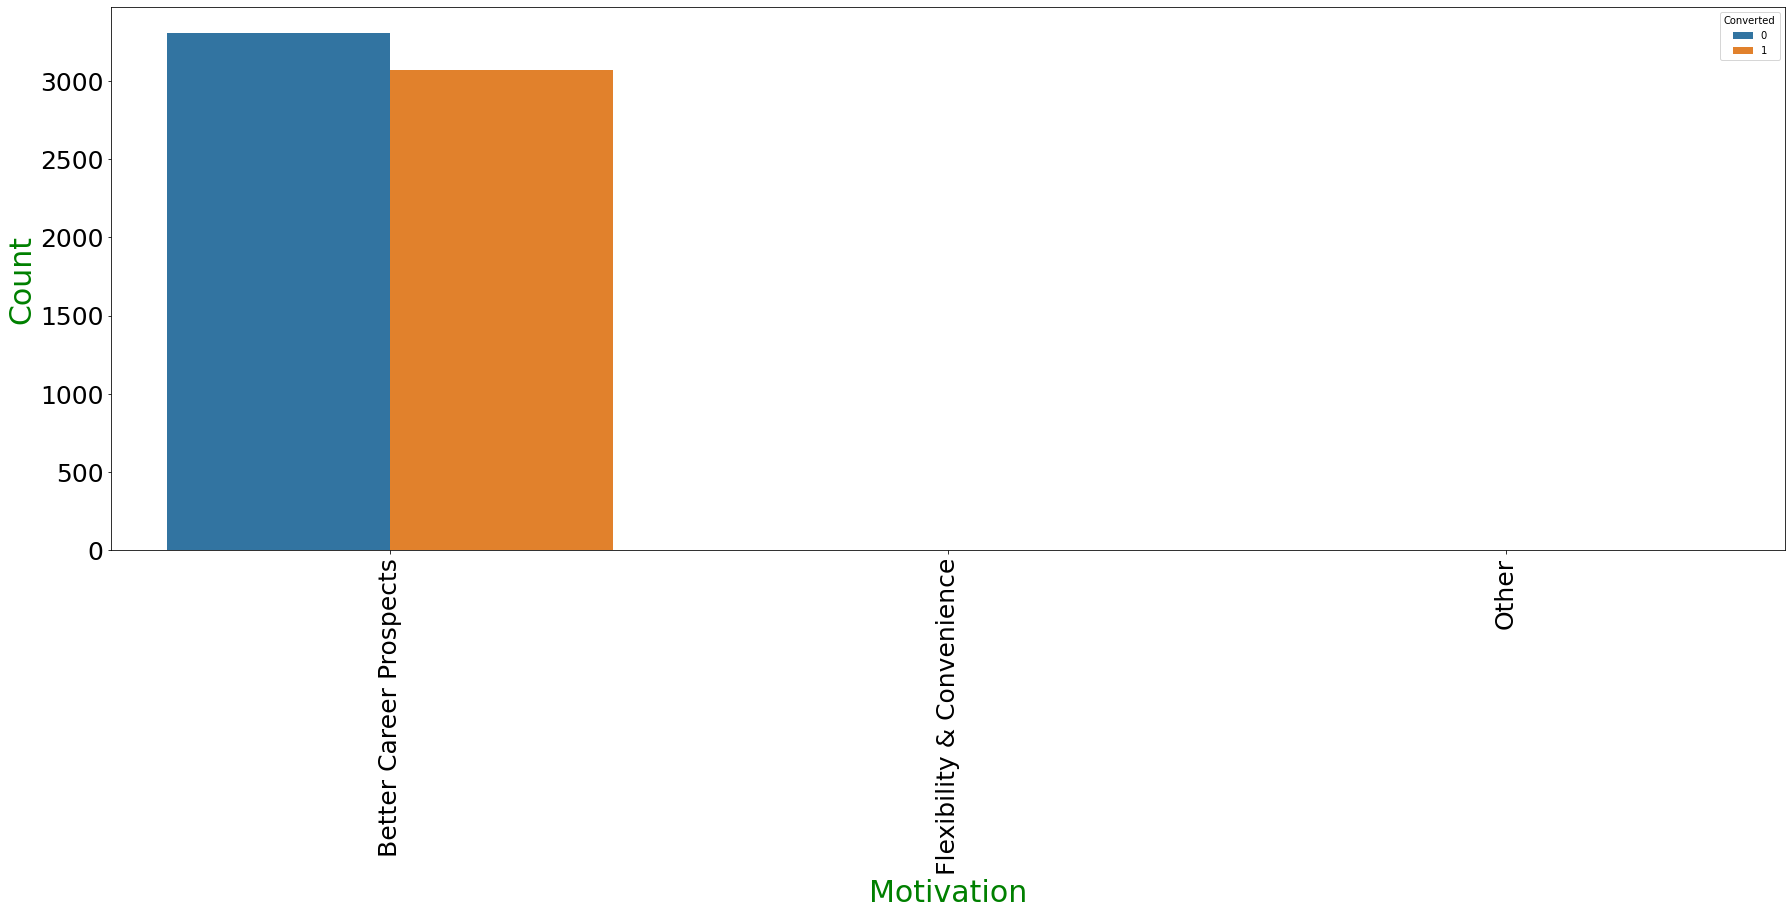

In [116]:
plt.figure(figsize=(30,10))
sns.countplot(x='Motivation', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Motivation',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

- Here we can see that this attribute is heavily skewed. So, we can drop this attribute.

In [117]:
data_copy.drop(['Motivation'], axis=1, inplace=True)

In [118]:
data_copy.shape

(9078, 26)

 <span style="color:darkred; font-weight:bold"> "Tags" or "Current Status of the Leads" Attribute</span>

In [119]:
data_copy['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [120]:
data_copy['Tags'].value_counts()

Will revert after reading the email                  2020
Ringing                                              1189
Interested in other courses                           507
Already a student                                     464
Closed by Horizzon                                    304
switched off                                          240
Busy                                                  185
Lost to EINS                                          171
Not doing further education                           144
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [121]:
data_copy.groupby(['Tags','Converted']).size().unstack()

Converted,0,1
Tags,,
Already a student,461.0,3.0
Busy,80.0,105.0
Closed by Horizzon,2.0,302.0
Diploma holder (Not Eligible),62.0,1.0
Graduation in progress,104.0,7.0
In confusion whether part time or DLP,4.0,1.0
Interested in full time MBA,113.0,3.0
Interested in Next batch,NaN,5.0
Interested in other courses,494.0,13.0


In [122]:
data_copy.groupby(['Tags','Converted']).size().unstack().loc[:,0].sort_values(ascending=False)

Tags
Ringing                                              1155.0
Interested in other courses                           494.0
Already a student                                     461.0
switched off                                          236.0
Not doing further education                           143.0
Interested  in full time MBA                          113.0
Graduation in progress                                104.0
invalid number                                         82.0
Busy                                                   80.0
Diploma holder (Not Eligible)                          62.0
Will revert after reading the email                    62.0
wrong number given                                     46.0
opp hangup                                             30.0
number not provided                                    25.0
in touch with EINS                                      9.0
Lost to Others                                          7.0
Still Thinking                     

In [123]:
data_copy.groupby(['Tags','Converted']).size().unstack().loc[:,1].sort_values(ascending=False)

Tags
Will revert after reading the email                  1958.0
Closed by Horizzon                                    302.0
Lost to EINS                                          167.0
Busy                                                  105.0
Ringing                                                34.0
Interested in other courses                            13.0
Graduation in progress                                  7.0
Interested in Next batch                                5.0
switched off                                            4.0
Lateral student                                         3.0
Interested  in full time MBA                            3.0
in touch with EINS                                      3.0
opp hangup                                              3.0
Already a student                                       3.0
Want to take admission but has financial problems       2.0
Not doing further education                             1.0
In confusion whether part time or D

- We can say that for many leads , the convertion didn't happen and they are just not interested to take te call , as a result the 'Ringing' category count is so high approx 1155
- for 236 non- converted leads it has been found that their phone is switched off.
- 1960 leads have converted who have reverted after reading the mail.
- 496 leads are interested in other courses.
- 462 leads are already student - as a result the didn't turn up.

In [124]:
data_copy['Tags'].replace(np.nan, 'Not Mentioned', inplace=True)

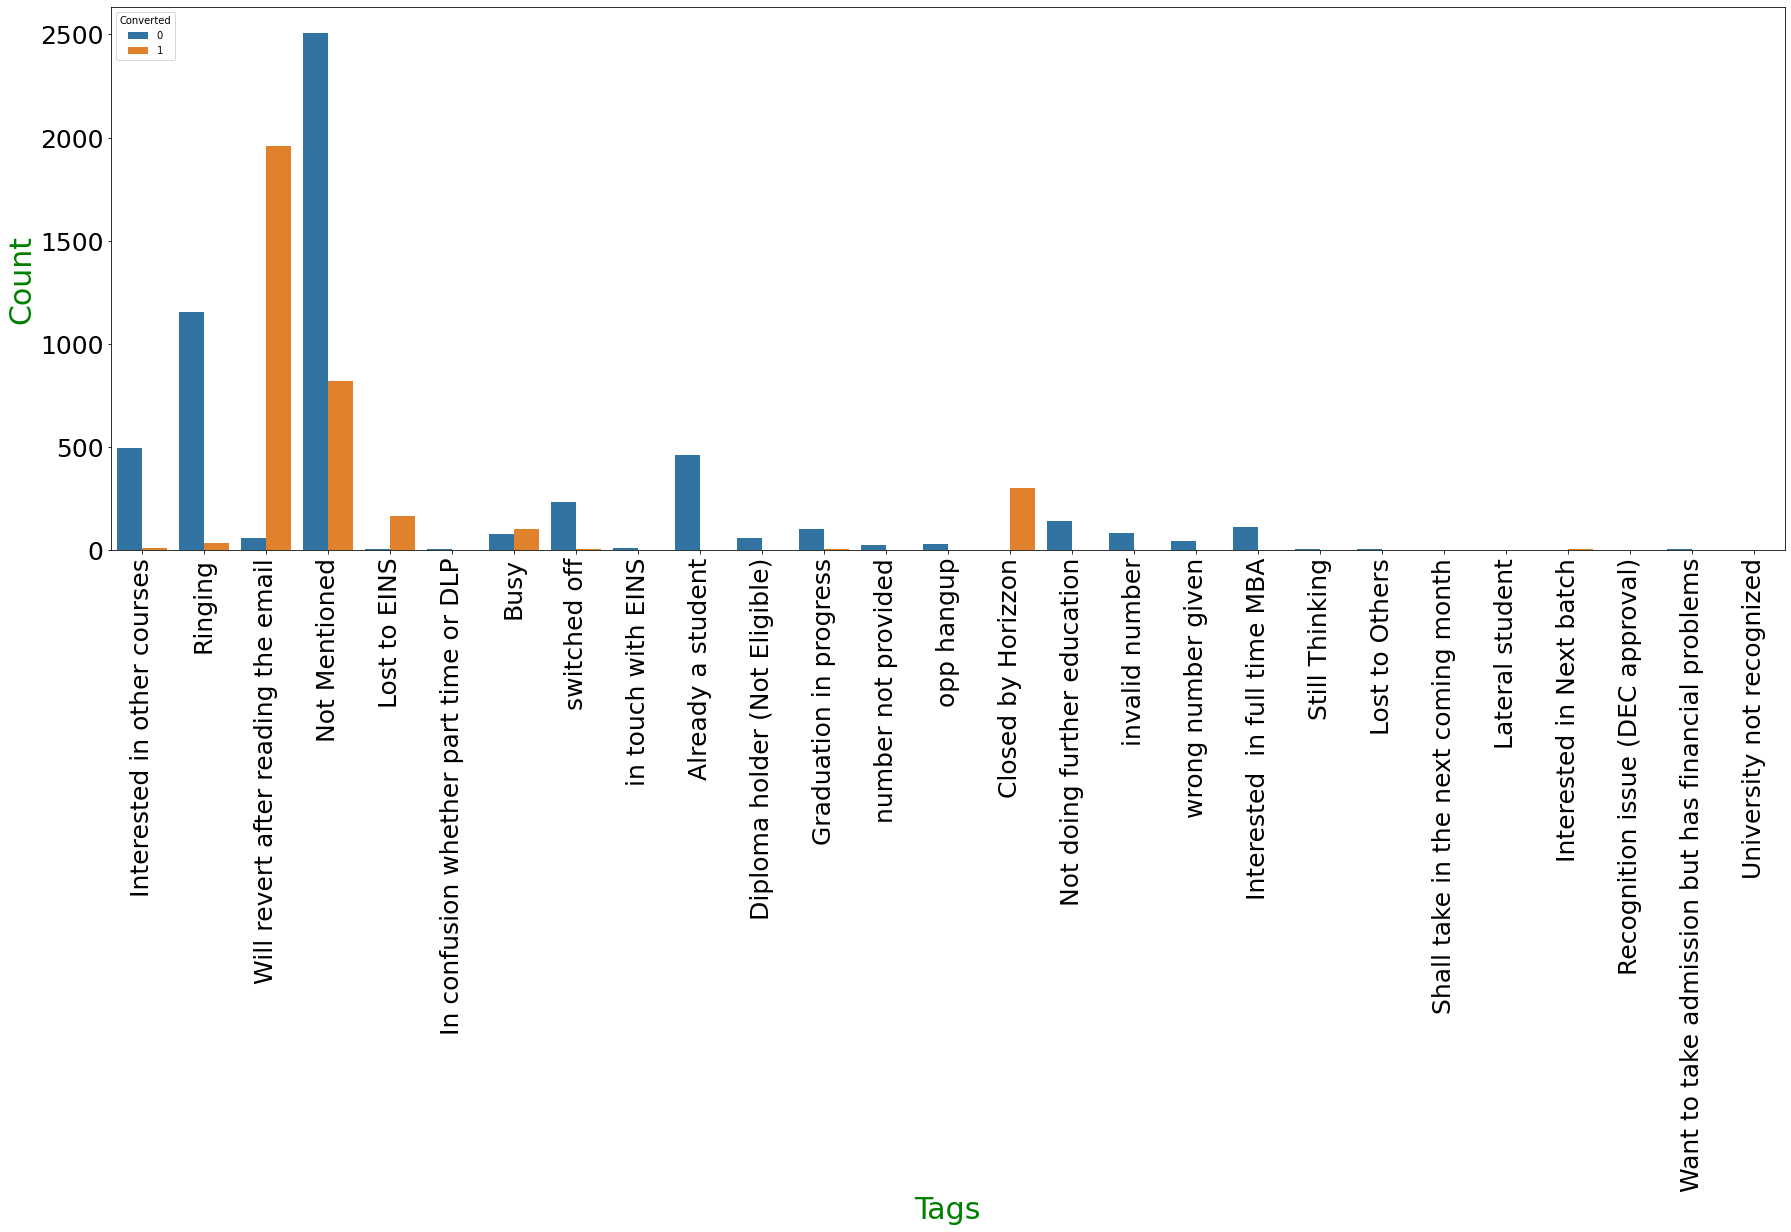

In [125]:
plt.figure(figsize=(30,10))
sns.countplot(x='Tags', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Tags',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [126]:
data_copy['Tags'] = data_copy['Tags'].replace(['invalid number','wrong number given','switched off'],'Mobile Number Issue')

In [127]:
data_copy['Tags'] = data_copy['Tags'].replace(['recognition issue (dec approval)', 'shall take in the next coming month', 
                                      'university not recognized', 'lateral student',
                                       'in confusion whether part time or dlp', 'interested in next batch', 'still thinking',
                                       'want to take admission but has financial problems', 'lost to others',
                                      'in touch with eins', 'number not provided', 'opp hangup', 'wrong number given',
                                      'diploma holder (not eligible)', 'invalid number', 'graduation in progress',
                                      'interested  in full time mba', 'not doing further education', 'lost to eins', 'busy',
                                      'switched off'], 'Others tags')

In [128]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                           0.000000
Lead Source                           0.000000
Do Not Email                          0.000000
Do Not Call                           0.000000
Converted                             0.000000
TotalVisits                           0.000000
Total_Time_Spent                      0.000000
Page Views Per Visit                  0.000000
Last Activity                         0.000000
Specialization                        0.000000
Current_Occupation                    0.000000
Search                                0.000000
Magazine                              0.000000
Newspaper Article                     0.000000
X Education Forums                    0.000000
Newspaper                             0.000000
Digital Advertisement                 0.000000
Through Recommendations               0.000000
Get_update                            0.000000
Tags                                  0.000000
Update me on Supply Chain Content     0.000000
Get updates o

 <span style="color:darkred; font-weight:bold"> "City" Attribute</span>

In [129]:
data_copy['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [130]:
data_copy.groupby(['City','Converted']).size().unstack()

Converted,0,1
City,,
Mumbai,1902,1275
Other Cities,408,271
Other Cities of Maharashtra,250,197
Other Metro Cities,224,154
Thane & Outskirts,412,334
Tier II Cities,49,25


In [131]:
data_copy[data_copy['City'].isna()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Get_update,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Payment_Mode,Free_Interview_Copy,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Mentioned,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,Not Mentioned,No,No,NaN,No,No,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Not Mentioned,...,No,No,No,Not Mentioned,No,No,NaN,No,No,Modified
12,API,Organic Search,No,No,1,11.0,1538,11.0,Email Opened,Management,...,No,No,No,Will revert after reading the email,No,No,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,API,Google,No,No,0,2.0,181,2.0,SMS Sent,Not Mentioned,...,No,No,No,Not Mentioned,No,No,NaN,No,No,Modified
9214,API,Organic Search,No,No,1,2.0,881,2.0,SMS Sent,Not Mentioned,...,No,No,No,Not Mentioned,No,No,NaN,No,No,SMS Sent
9217,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,Ringing,No,No,NaN,No,No,SMS Sent
9226,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,Not Mentioned,...,No,No,No,Ringing,No,No,NaN,No,No,Modified


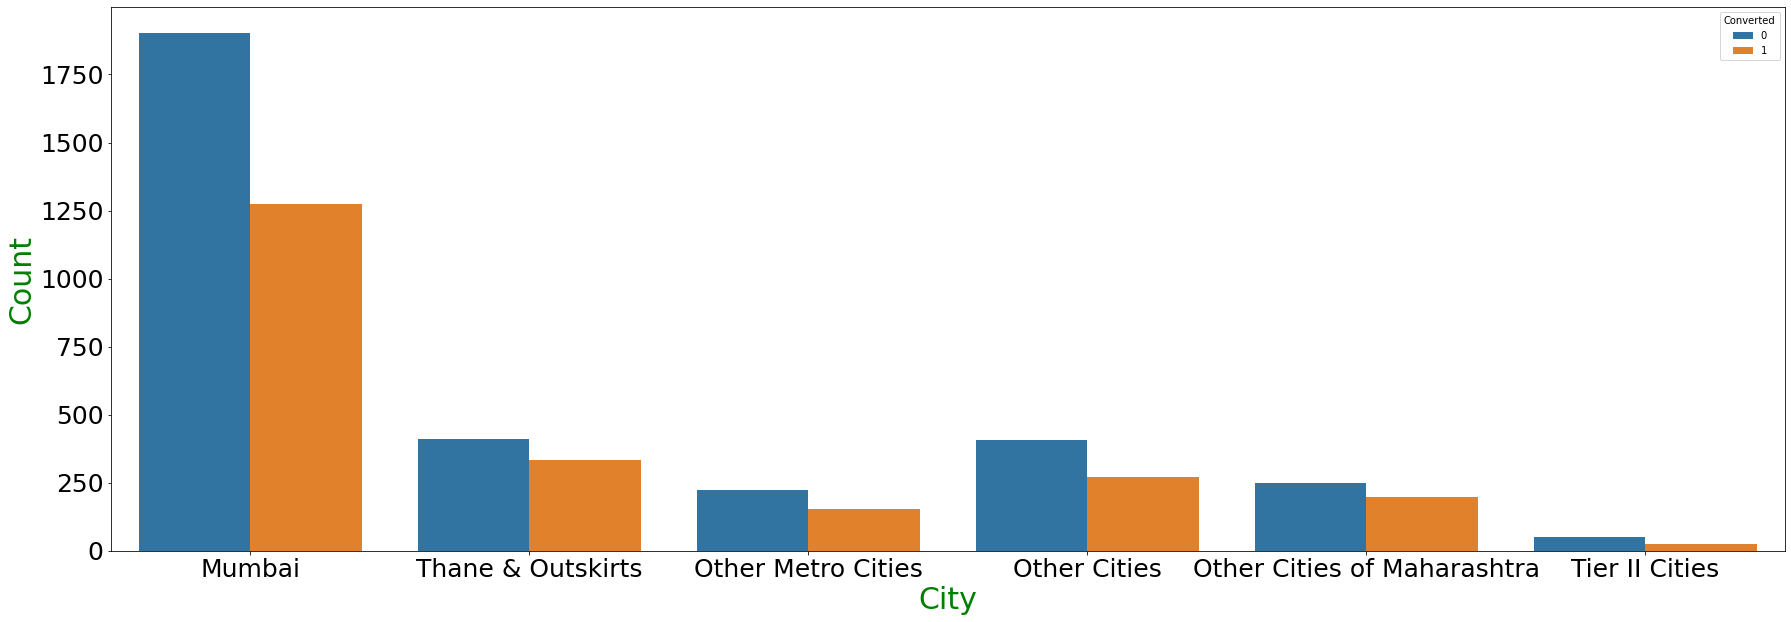

In [132]:
plt.figure(figsize=(30,10))
sns.countplot(x='City', data=data_copy, hue='Converted')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('City',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

- We can see that few null values are present ere , 
- According to my assumption tose can be categorized under 'Oter Cities' as Other cities don't specify any particular name of city.
- Many applicants are from Mumbai irrespective of convertion ratio

In [133]:
data_copy['City'].replace(np.nan, 'Other Cities', inplace=True)

In [134]:
data_copy.shape

(9078, 26)

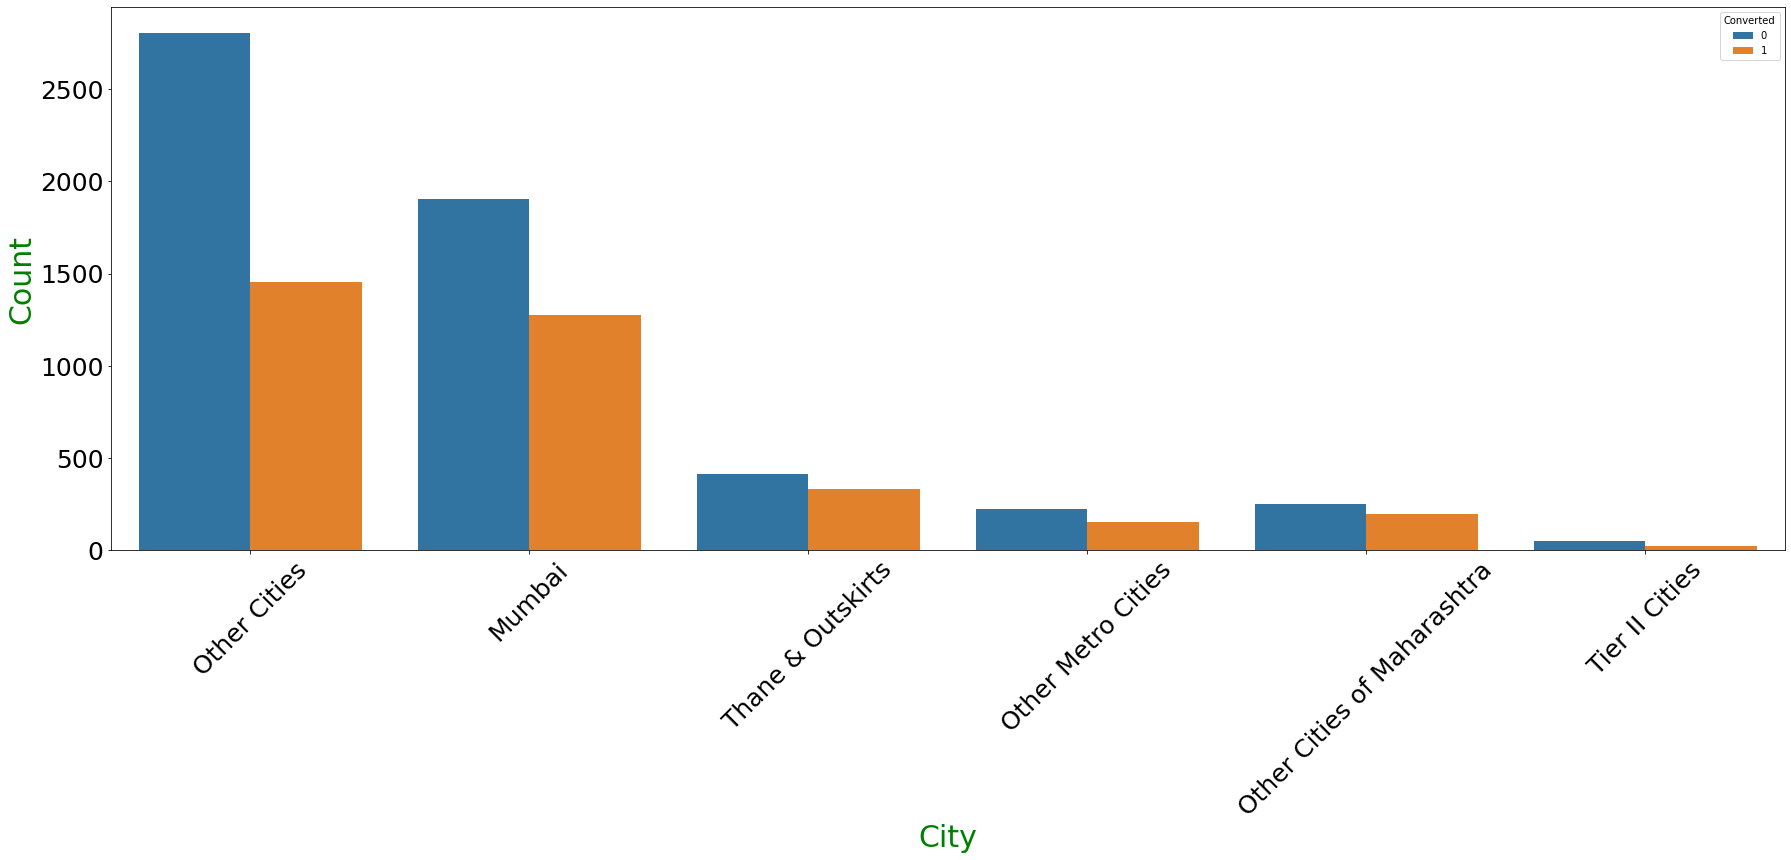

In [135]:
plt.figure(figsize=(30,10))
sns.countplot(x='City', data=data_copy, hue='Converted')
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.xlabel('City',fontdict={'color':'g','size':30})
plt.ylabel('Count', fontdict={'color':'g','size':30})
plt.show()

In [136]:
data_copy.drop(['City'], axis=1, inplace=True)

In [137]:
data_copy.isna().sum()/len(data_copy) * 100

Lead Origin                          0.0
Lead Source                          0.0
Do Not Email                         0.0
Do Not Call                          0.0
Converted                            0.0
TotalVisits                          0.0
Total_Time_Spent                     0.0
Page Views Per Visit                 0.0
Last Activity                        0.0
Specialization                       0.0
Current_Occupation                   0.0
Search                               0.0
Magazine                             0.0
Newspaper Article                    0.0
X Education Forums                   0.0
Newspaper                            0.0
Digital Advertisement                0.0
Through Recommendations              0.0
Get_update                           0.0
Tags                                 0.0
Update me on Supply Chain Content    0.0
Get updates on DM Content            0.0
Payment_Mode                         0.0
Free_Interview_Copy                  0.0
Last Notable Act

- There are no Null values present, all data are clean

In [138]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead Origin                        9078 non-null   object 
 1   Lead Source                        9078 non-null   object 
 2   Do Not Email                       9078 non-null   object 
 3   Do Not Call                        9078 non-null   object 
 4   Converted                          9078 non-null   int64  
 5   TotalVisits                        9078 non-null   float64
 6   Total_Time_Spent                   9078 non-null   int64  
 7   Page Views Per Visit               9078 non-null   float64
 8   Last Activity                      9078 non-null   object 
 9   Specialization                     9078 non-null   object 
 10  Current_Occupation                 9078 non-null   object 
 11  Search                             9078 non-null   objec

 <span style="color:darkred; font-weight:bold"> "Newspaper Article" Attribute</span>

In [139]:
data_copy.groupby(['Newspaper Article','Converted']).size().unstack()

Converted,0,1
Newspaper Article,,
No,5640,3436
Yes,1,1


<AxesSubplot:xlabel='Newspaper Article'>

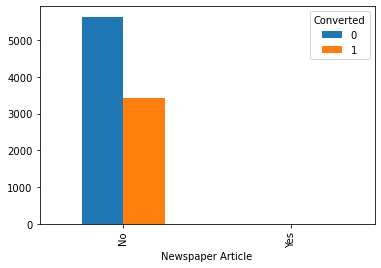

In [140]:
data_copy.groupby(['Newspaper Article','Converted']).size().unstack().plot(kind='bar')

 <span style="color:darkred; font-weight:bold"> "Through Recommendations" Attribute</span>

In [141]:
data_copy.groupby(['Through Recommendations','Converted']).size().unstack()

Converted,0,1
Through Recommendations,,
No,5639,3432
Yes,2,5


<AxesSubplot:xlabel='Through Recommendations'>

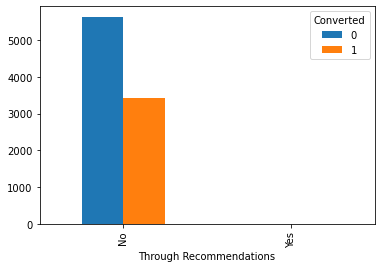

In [142]:
data_copy.groupby(['Through Recommendations','Converted']).size().unstack().plot(kind='bar')

- The number of candidates who came through recomendations is very less. Out of all the cndidates who didn't come through Recommendations, out of all them number of non-converted leads is higher than the converted one.

- Same is applicable for Newspaper Article attribute too.

- These two attributes can be dropped off , Both Newspaper and Nespaper Article - these two attributes carry same meaning. So both of these can be dropped off.

In [143]:
data_copy.drop(['Through Recommendations','Newspaper Article', 'Newspaper'], axis=1, inplace=True)

<span style="color:darkred; font-weight:bold"> "Get_update" Attribute</span>

In [144]:
data_copy.groupby(['Get_update','Converted']).size().unstack()

Converted,0,1
Get_update,,
No,5641,3437


<AxesSubplot:xlabel='Get_update'>

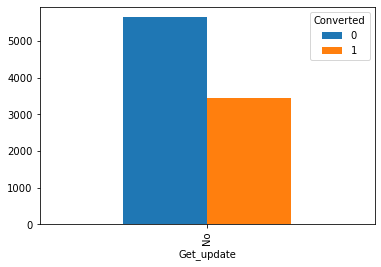

In [145]:
data_copy.groupby(['Get_update','Converted']).size().unstack().plot(kind='bar')

 <span style="color:darkred; font-weight:bold"> "Magazine" Attribute</span>

In [146]:
data_copy.groupby(['Magazine','Converted']).size().unstack()

Converted,0,1
Magazine,,
No,5641,3437


<AxesSubplot:xlabel='Magazine'>

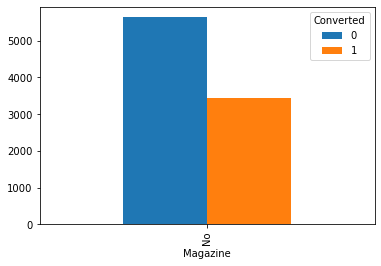

In [147]:
data_copy.groupby(['Magazine','Converted']).size().unstack().plot(kind='bar')

 <span style="color:darkred; font-weight:bold"> "Search" Attribute</span>

In [148]:
data_copy.groupby(['Search','Converted']).size().unstack()

Converted,0,1
Search,,
No,5632,3432
Yes,9,5


<span style="color:darkred; font-weight:bold"> "X Education Forums" Attribute</span>

In [149]:
data_copy.groupby(['X Education Forums','Converted']).size().unstack()

Converted,0,1
X Education Forums,,
No,5640.0,3437.0
Yes,1.0,NaN


<span style="color:darkred; font-weight:bold"> "Digital Advertisement" Attribute</span>

In [150]:
data_copy.groupby(['Digital Advertisement','Converted']).size().unstack()

Converted,0,1
Digital Advertisement,,
No,5638,3436
Yes,3,1


<span style="color:darkred; font-weight:bold"> "Get updates on DM Content" Attribute</span>

In [151]:
data_copy.groupby(['Get updates on DM Content','Converted']).size().unstack()

Converted,0,1
Get updates on DM Content,,
No,5641,3437


<span style="color:darkred; font-weight:bold"> "Update me on Supply Chain Content" Attribute</span>

In [152]:
data_copy.groupby(['Update me on Supply Chain Content','Converted']).size().unstack()

Converted,0,1
Update me on Supply Chain Content,,
No,5641,3437


<span style="color:darkred; font-weight:bold"> "Payment_Mode" Attribute</span>

In [153]:
data_copy.groupby(['Payment_Mode','Converted']).size().unstack()

Converted,0,1
Payment_Mode,,
No,5641,3437


<span style="color:darkred; font-weight:bold"> "Do Not Email" Attribute</span>

In [154]:
data_copy.groupby(['Do Not Email','Converted']).size().unstack()

Converted,0,1
Do Not Email,,
No,5029,3331
Yes,612,106


<span style="color:darkred; font-weight:bold"> "Do Not Call" Attribute</span>

In [155]:
data_copy.groupby(['Do Not Call','Converted']).size().unstack()

Converted,0,1
Do Not Call,,
No,5641.0,3435.0
Yes,NaN,2.0


<span style="color:darkred; font-weight:bold"> "Free_Interview_Copy" Attribute</span>

In [156]:
data_copy.groupby(['Free_Interview_Copy','Converted']).size().unstack()

Converted,0,1
Free_Interview_Copy,,
No,3784,2411
Yes,1857,1026


- Search, X Education Forims, Digital Advertisement, Magazine all these are different types of advertisement media for X Eucation.
- We also can see tat almost all of these show skewness. So dropping off all these attributes except Magazine
- 'Get updates on DM Content','Get_update','Update me on Supply Chain Content' and 'Payment_Mode' all are same. So we can keep any one of tese. We are keeping 'Get_update' attribute and deleting rest all.
- Also 'Last Activity' and 'Last Notable Activity' both seem to be same by meaning and column definition. So, deleting 'Last Notable Activity' column.
- Do Not Call also seem to be not very useful for this . So dropping off this attribute too

In [157]:
data_copy.drop(['Digital Advertisement',
                'X Education Forums',
                'Search','Get_update',
                'Get updates on DM Content',
                'Last Notable Activity',
                'Update me on Supply Chain Content',
                'Payment_Mode',
                'Do Not Call','Magazine'], axis=1, inplace=True)

In [158]:
data_copy.shape

(9078, 12)

In [159]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           9078 non-null   object 
 1   Lead Source           9078 non-null   object 
 2   Do Not Email          9078 non-null   object 
 3   Converted             9078 non-null   int64  
 4   TotalVisits           9078 non-null   float64
 5   Total_Time_Spent      9078 non-null   int64  
 6   Page Views Per Visit  9078 non-null   float64
 7   Last Activity         9078 non-null   object 
 8   Specialization        9078 non-null   object 
 9   Current_Occupation    9078 non-null   object 
 10  Tags                  9078 non-null   object 
 11  Free_Interview_Copy   9078 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 922.0+ KB


#### Outlier detection and imputation

In [160]:
outliers = []
upper_lim = 0
lower_lim = 0
def outlier_detection(df,x):
    global outliers
    x_dict = dict(df[x].describe())
    print(x_dict)
    Q1 = x_dict['25%']
    print("Q1 :", Q1)
    Q3 = x_dict['75%']
    print("Q3 :", Q3)
    IQR = Q3 - Q1
    print("Inter quartile range is ", IQR)
    global lower_lim
    global upper_lim
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    print("The lower limit is ", round(lower_lim))
    print("The upper limit is ", round(upper_lim))

    for i in df[x]:
        if ((i > upper_lim) | (i < lower_lim)):
            outliers.append(i)
#    print("The outliers of ", x ,"is :", outliers)

In [161]:
outlier_detection(data_copy, 'TotalVisits')

{'count': 9078.0, 'mean': 3.4521921128001765, 'std': 4.852418776494715, 'min': 0.0, '25%': 1.0, '50%': 3.0, '75%': 5.0, 'max': 251.0}
Q1 : 1.0
Q3 : 5.0
Inter quartile range is  4.0
The lower limit is  -5
The upper limit is  11


In [162]:
len(outliers)

266

In [163]:
data_copy.loc[(data_copy['TotalVisits'] > upper_lim) & (data_copy['TotalVisits'] <= max(data_copy['TotalVisits']))]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Tags,Free_Interview_Copy
56,Landing Page Submission,Referral Sites,No,1,13.0,436,13.00,Form Submitted on Website,Management,Unemployed,Busy,No
58,Landing Page Submission,Organic Search,No,0,17.0,409,8.50,Email Opened,Management,Unemployed,Interested in other courses,Yes
102,Landing Page Submission,Google,No,0,12.0,809,4.00,Unreachable,Management,Not Mentioned,Not Mentioned,No
125,API,Referral Sites,No,0,16.0,53,16.00,Olark Chat Conversation,Not Mentioned,Not Mentioned,Not Mentioned,No
168,Landing Page Submission,Referral Sites,No,0,12.0,493,12.00,Email Link Clicked,Management,Not Mentioned,Not Mentioned,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9016,Landing Page Submission,Direct Traffic,No,1,25.0,1569,2.08,Email Opened,Business Administration,Working Professional,Closed by Horizzon,Yes
9132,Landing Page Submission,Organic Search,No,0,17.0,119,2.83,Page Visited on Website,Management,Unemployed,Ringing,No
9138,Landing Page Submission,Google,No,1,14.0,376,2.80,SMS Sent,Management,Unemployed,Will revert after reading the email,No
9229,Landing Page Submission,Organic Search,No,1,13.0,1226,6.50,SMS Sent,Management,Unemployed,Will revert after reading the email,Yes


- We can see only 267 rows are contributing to te existance of these outliers which is equal to 2.93% of total dataset. So, we can drop those instances.

In [164]:
filtered_data_Total_Visit = data_copy.loc[(data_copy['TotalVisits'] > upper_lim) & 
                                            (data_copy['TotalVisits'] <= max(data_copy['TotalVisits']))]

In [165]:
filtered_data_Total_Visit

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Tags,Free_Interview_Copy
56,Landing Page Submission,Referral Sites,No,1,13.0,436,13.00,Form Submitted on Website,Management,Unemployed,Busy,No
58,Landing Page Submission,Organic Search,No,0,17.0,409,8.50,Email Opened,Management,Unemployed,Interested in other courses,Yes
102,Landing Page Submission,Google,No,0,12.0,809,4.00,Unreachable,Management,Not Mentioned,Not Mentioned,No
125,API,Referral Sites,No,0,16.0,53,16.00,Olark Chat Conversation,Not Mentioned,Not Mentioned,Not Mentioned,No
168,Landing Page Submission,Referral Sites,No,0,12.0,493,12.00,Email Link Clicked,Management,Not Mentioned,Not Mentioned,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9016,Landing Page Submission,Direct Traffic,No,1,25.0,1569,2.08,Email Opened,Business Administration,Working Professional,Closed by Horizzon,Yes
9132,Landing Page Submission,Organic Search,No,0,17.0,119,2.83,Page Visited on Website,Management,Unemployed,Ringing,No
9138,Landing Page Submission,Google,No,1,14.0,376,2.80,SMS Sent,Management,Unemployed,Will revert after reading the email,No
9229,Landing Page Submission,Organic Search,No,1,13.0,1226,6.50,SMS Sent,Management,Unemployed,Will revert after reading the email,Yes


In [166]:
data_copy.drop(index=filtered_data_Total_Visit.index, inplace=True)

In [167]:
data_copy.shape

(8812, 12)

In [168]:
outliers.clear()

In [169]:
outlier_detection(data_copy, 'Page Views Per Visit')

{'count': 8812.0, 'mean': 2.2814446209714037, 'std': 1.956795715802417, 'min': 0.0, '25%': 1.0, '50%': 2.0, '75%': 3.0, 'max': 11.0}
Q1 : 1.0
Q3 : 3.0
Inter quartile range is  2.0
The lower limit is  -2
The upper limit is  6


In [170]:
len(outliers)

293

- For this attribute also, we can see the number of outliers are contributing to only 3.33% of whole present dataset. So we can drop these instances too.

In [171]:
data_copy.loc[(data_copy['Page Views Per Visit'] > upper_lim) & 
                                            (data_copy['Page Views Per Visit'] <= max(data_copy['Page Views Per Visit']))]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Tags,Free_Interview_Copy
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.0,Email Opened,Travel and Tourism,Unemployed,Will revert after reading the email,Yes
12,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Management,Unemployed,Will revert after reading the email,No
41,Landing Page Submission,Organic Search,Yes,0,7.0,38,7.0,Unsubscribed,Management,Unemployed,Busy,Yes
57,API,Referral Sites,No,1,8.0,903,8.0,Page Visited on Website,Management,Unemployed,Will revert after reading the email,No
172,API,Organic Search,No,0,7.0,1334,7.0,Email Opened,Business Administration,Not Mentioned,Interested in other courses,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9112,Landing Page Submission,Organic Search,Yes,0,9.0,44,9.0,Email Bounced,Travel and Tourism,Not Mentioned,Not Mentioned,Yes
9129,Landing Page Submission,Organic Search,No,0,9.0,82,9.0,Email Opened,Management,Unemployed,Ringing,Yes
9151,Landing Page Submission,Google,No,0,7.0,133,7.0,SMS Sent,Management,Unemployed,Ringing,No
9215,Landing Page Submission,Organic Search,No,0,8.0,397,8.0,Email Opened,Business Administration,Not Mentioned,Not Mentioned,Yes


In [172]:
filtered_data_Page_Views = data_copy.loc[(data_copy['Page Views Per Visit'] > upper_lim) & 
                                            (data_copy['Page Views Per Visit'] <= max(data_copy['Page Views Per Visit']))]

In [173]:
data_copy.drop(index=filtered_data_Page_Views.index, inplace=True)

In [174]:
data_copy.shape

(8519, 12)

In [175]:
outliers.clear()

In [176]:
outlier_detection(data_copy, 'Total_Time_Spent')

{'count': 8519.0, 'mean': 472.00833431153893, 'std': 543.2489796680172, 'min': 0.0, '25%': 0.0, '50%': 234.0, '75%': 897.0, 'max': 2272.0}
Q1 : 0.0
Q3 : 897.0
Inter quartile range is  897.0
The lower limit is  -1346
The upper limit is  2242


In [177]:
len(outliers)

2

In [178]:
data_copy.loc[(data_copy['Total_Time_Spent'] > upper_lim) & 
                                            (data_copy['Total_Time_Spent'] <= max(data_copy['Total_Time_Spent']))]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Last Activity,Specialization,Current_Occupation,Tags,Free_Interview_Copy
6314,Landing Page Submission,Direct Traffic,No,0,2.0,2272,2.0,SMS Sent,Management,Unemployed,Mobile Number Issue,Yes
8745,API,Organic Search,No,1,3.0,2253,3.0,Email Opened,Management,Unemployed,Will revert after reading the email,No


In [179]:
filtered_data_Total_Time_Spent = data_copy.loc[(data_copy['Total_Time_Spent'] > upper_lim) & 
                                            (data_copy['Total_Time_Spent'] <= max(data_copy['Total_Time_Spent']))]

In [180]:
data_copy.drop(index=filtered_data_Total_Time_Spent.index, inplace=True)

In [181]:
data_copy.shape

(8517, 12)

<AxesSubplot:xlabel='TotalVisits'>

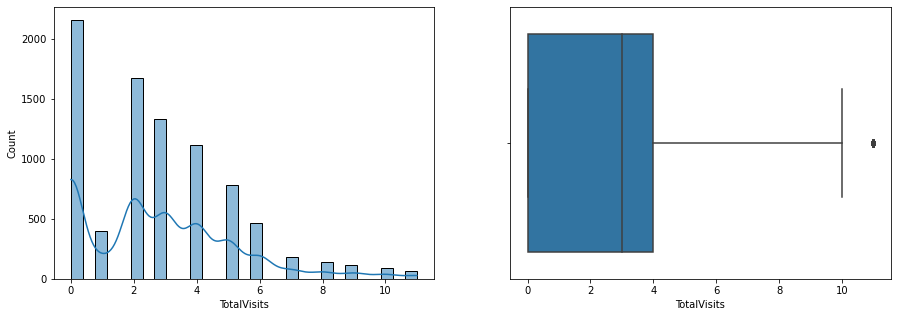

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['TotalVisits'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['TotalVisits'], ax=axes[1])

<AxesSubplot:xlabel='Total_Time_Spent'>

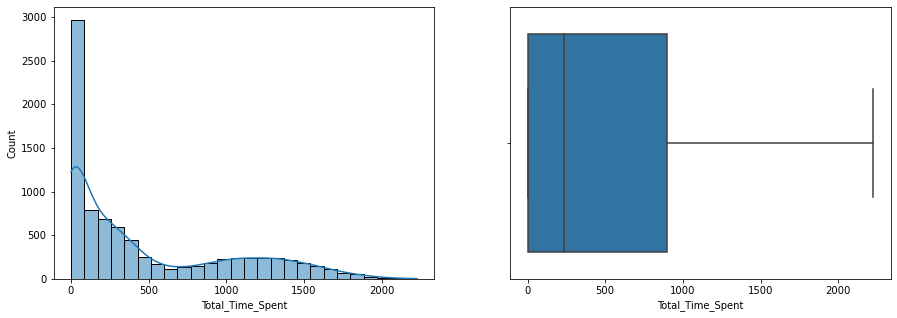

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['Total_Time_Spent'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['Total_Time_Spent'], ax=axes[1])

<AxesSubplot:xlabel='Page Views Per Visit'>

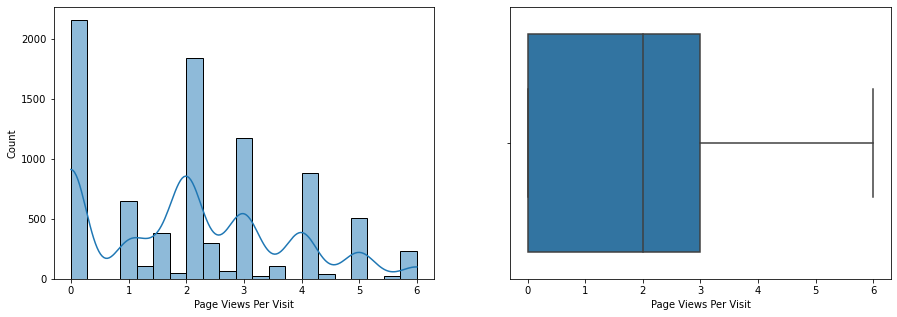

In [184]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.histplot(x=data_copy['Page Views Per Visit'], kde=True, ax=axes[0])
sns.boxplot(x=data_copy['Page Views Per Visit'], ax=axes[1])

In [185]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           8517 non-null   object 
 1   Lead Source           8517 non-null   object 
 2   Do Not Email          8517 non-null   object 
 3   Converted             8517 non-null   int64  
 4   TotalVisits           8517 non-null   float64
 5   Total_Time_Spent      8517 non-null   int64  
 6   Page Views Per Visit  8517 non-null   float64
 7   Last Activity         8517 non-null   object 
 8   Specialization        8517 non-null   object 
 9   Current_Occupation    8517 non-null   object 
 10  Tags                  8517 non-null   object 
 11  Free_Interview_Copy   8517 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


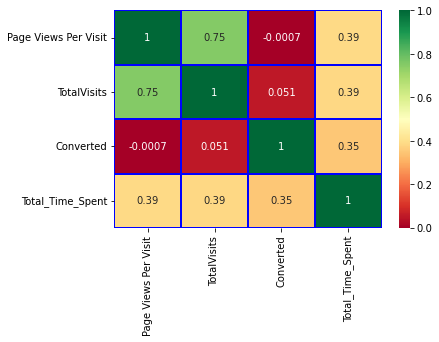

In [186]:
features = ['Page Views Per Visit','TotalVisits','Converted','Total_Time_Spent']
sns.heatmap(data_copy[features].corr(),cmap="RdYlGn", linecolor='blue',linewidth=1.5,annot=True)
plt.show()

In [187]:
df_dummy_encoded = pd.get_dummies(data_copy, drop_first=True)

In [188]:
df_dummy_encoded.columns

Index(['Converted', 'TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activi

In [189]:
df_dummy_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Converted                                               8517 non-null   int64  
 1   TotalVisits                                             8517 non-null   float64
 2   Total_Time_Spent                                        8517 non-null   int64  
 3   Page Views Per Visit                                    8517 non-null   float64
 4   Lead Origin_Landing Page Submission                     8517 non-null   uint8  
 5   Lead Origin_Lead Add Form                               8517 non-null   uint8  
 6   Lead Origin_Lead Import                                 8517 non-null   uint8  
 7   Lead Source_Direct Traffic                              8517 non-null   uint8  
 8   Lead Source_Facebook                  

### Splitting into Train and Test Set

In [190]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_dummy_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

In [191]:
df_train.head()

,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Others tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Free_Interview_Copy_Yes
6996,1,5.0,1184,5.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7638,0,5.0,355,5.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2320,0,10.0,225,2.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7620,1,4.0,207,4.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9128,0,4.0,60,4.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df_test.head()

,Converted,TotalVisits,Total_Time_Spent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Others tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Free_Interview_Copy_Yes
6403,0,8.0,1241,1.6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
714,0,4.0,32,4.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5654,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6201,1,3.0,829,3.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1749,0,2.0,1188,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### X_train, y_train, X_test, y_test

In [193]:
X_train = df_train.drop('Converted', axis=1)
y_train = df_train['Converted']

X_test = df_test.drop('Converted', axis=1)
y_test = df_test['Converted']

#### Checking shape of X_train, y_train, X_test, y_test

In [194]:
X_train.shape

(5961, 70)

In [195]:
X_test.shape

(2556, 70)

In [196]:
y_train.shape

(5961,)

In [197]:
y_test.shape

(2556,)

### Numerical Column Preprocessing

In [198]:
X_train_num = X_train[['TotalVisits','Total_Time_Spent','Page Views Per Visit']]

In [199]:
X_train_cat = X_train.select_dtypes(include=['object','category','uint8'])

In [200]:
X_train_num.columns

Index(['TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit'], dtype='object')

In [201]:
X_train_cat.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business 

In [202]:
X_test_num = X_test[['TotalVisits','Total_Time_Spent','Page Views Per Visit']]

In [203]:
X_test_cat = X_test.select_dtypes(include=['object','category','uint8'])

#### Numerical Feature Preprocessing on Train set: Scaling

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()   # Will bring all the values between 0 and 1 , distribution won't be affected

#### Scaling Train Data

In [206]:
X_train_num.head()

,TotalVisits,Total_Time_Spent,Page Views Per Visit
6996,5.0,1184,5.0
7638,5.0,355,5.0
2320,10.0,225,2.5
7620,4.0,207,4.0
9128,4.0,60,4.0


In [207]:
num_cols_scaled = scaler.fit_transform(X_train_num)

In [208]:
num_cols_scaled[:5]

array([[0.45454545, 0.53189578, 0.83333333],
       [0.45454545, 0.15947889, 0.83333333],
       [0.90909091, 0.10107817, 0.41666667],
       [0.36363636, 0.09299191, 0.66666667],
       [0.36363636, 0.02695418, 0.66666667]])

In [209]:
num_scaled_df = pd.DataFrame(num_cols_scaled, columns = X_train_num.columns)

In [210]:
num_scaled_df[:5]

,TotalVisits,Total_Time_Spent,Page Views Per Visit
0,0.454545,0.531896,0.833333
1,0.454545,0.159479,0.833333
2,0.909091,0.101078,0.416667
3,0.363636,0.092992,0.666667
4,0.363636,0.026954,0.666667


In [211]:
X_train_cat.index

Int64Index([6996, 7638, 2320, 7620, 9128, 3643, 8005, 8173, 1330,  213,
            ...
            4753,  908, 6146, 8585, 4504,  400,   90, 8733, 7530, 6140],
           dtype='int64', length=5961)

- Making same index of scaled numerical dataframe and categorical dataframe

In [212]:
X_train_cat.index = num_scaled_df.index

In [213]:
X_train_final = pd.concat([num_scaled_df, X_train_cat], axis=1)

In [214]:
X_train_final

,TotalVisits,Total_Time_Spent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Others tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Free_Interview_Copy_Yes
0,0.454545,0.531896,0.833333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.454545,0.159479,0.833333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.909091,0.101078,0.416667,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.363636,0.092992,0.666667,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.363636,0.026954,0.666667,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.363636,0.608266,0.666667,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5957,0.272727,0.096137,0.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,0.090909,0.075022,0.166667,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,0.272727,0.022462,0.500000,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Scaling on Test Data - Numerical Columns

In [215]:
X_test_num_scaled = scaler.transform(X_test_num)

In [216]:
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)

In [217]:
X_test_num_scaled_df.head()

,TotalVisits,Total_Time_Spent,Page Views Per Visit
0,0.727273,0.557502,0.266667
1,0.363636,0.014376,0.666667
2,0.000000,0.000000,0.000000
3,0.272727,0.372417,0.500000
4,0.181818,0.533693,0.166667


In [218]:
X_test_num_scaled_df.index

RangeIndex(start=0, stop=2556, step=1)

In [219]:
X_test_num_scaled.shape

(2556, 3)

#### Creating Final X_test Dataframe

In [220]:
X_test_cat.index

Int64Index([6403,  714, 5654, 6201, 1749, 3575, 4116, 7740, 5410, 6232,
            ...
            4177, 9201, 7776, 1473, 2293, 4099, 7728, 3328, 7139, 4103],
           dtype='int64', length=2556)

In [221]:
X_test_cat.index = X_test_num_scaled_df.index

In [222]:
X_test_cat.index

RangeIndex(start=0, stop=2556, step=1)

In [223]:
X_test_final = pd.concat([X_test_num_scaled_df, X_test_cat], axis=1)

In [224]:
X_test_final.shape

(2556, 70)

## Modelling

In [225]:
import statsmodels.api as sm

In [226]:
y_train.shape

(5961,)

In [227]:
X_train_final.shape

(5961, 70)

In [228]:
X_train_final.index

RangeIndex(start=0, stop=5961, step=1)

In [229]:
y_train.index

Int64Index([6996, 7638, 2320, 7620, 9128, 3643, 8005, 8173, 1330,  213,
            ...
            4753,  908, 6146, 8585, 4504,  400,   90, 8733, 7530, 6140],
           dtype='int64', length=5961)

In [230]:
y_train.index = X_train_final.index

In [231]:
y_train.index

RangeIndex(start=0, stop=5961, step=1)

In [232]:
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: Converted, dtype: int64

In [233]:
X_train_final.head()

,TotalVisits,Total_Time_Spent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Tags_Others tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Free_Interview_Copy_Yes
0,0.454545,0.531896,0.833333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.454545,0.159479,0.833333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.909091,0.101078,0.416667,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.363636,0.092992,0.666667,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.363636,0.026954,0.666667,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


- We can see there are 70 columns all together, We can reduce the number of variables to 20 by using RFE

In [234]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [235]:
lm = LogisticRegression()
lm.fit(X_train_final, y_train)

LogisticRegression()

In [236]:
# Running RFE with the output number of the variable equal to 12

rfe = RFE(lm,n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train_final, y_train)

In [237]:
rfe.ranking_

array([ 1,  1,  1, 24, 19, 17,  5,  1,  6, 47, 23, 26,  7, 49, 50, 34, 16,
       37, 45,  1, 48,  1, 28, 21, 13, 38, 33,  1, 42,  1, 18,  8, 35, 32,
       31, 40, 36, 46, 30, 39, 25,  9,  1,  1,  1,  1,  1,  1,  2, 27, 43,
       11,  1,  4, 20,  1, 22,  1,  1,  3, 10, 51,  1, 14, 15, 41, 44,  1,
       12, 29])

In [238]:
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False])

In [239]:
rfe_df = pd.DataFrame({'feature':X_train_final.columns,
                      'feature_ranking':rfe.ranking_,
                      'feature support':rfe.support_})

In [240]:
rfe_df

,feature,feature_ranking,feature support
0,TotalVisits,1,True
1,Total_Time_Spent,1,True
2,Page Views Per Visit,1,True
3,Lead Origin_Landing Page Submission,24,False
4,Lead Origin_Lead Add Form,19,False
...,...,...,...
65,Tags_University not recognized,41,False
66,Tags_Want to take admission but has financial ...,44,False
67,Tags_Will revert after reading the email,1,True
68,Tags_in touch with EINS,12,False


In [241]:
rfe_df.loc[ (rfe_df['feature_ranking'] == 1)]

,feature,feature_ranking,feature support
0,TotalVisits,1,True
1,Total_Time_Spent,1,True
2,Page Views Per Visit,1,True
7,Lead Source_Facebook,1,True
19,Lead Source_Welingak Website,1,True
21,Do Not Email_Yes,1,True
27,Last Activity_Olark Chat Conversation,1,True
29,Last Activity_SMS Sent,1,True
42,Current_Occupation_Other,1,True
43,Current_Occupation_Student,1,True


In [242]:
rfe_selected_features = X_train_final.columns[rfe.support_]

In [243]:
rfe_selected_features

Index(['TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Mobile Number Issue', 'Tags_Not Mentioned',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [244]:
X_train_final_rfe = X_train_final[rfe_selected_features]
X_train_final_rfe.shape

(5961, 20)

In [245]:
X_train_const = sm.add_constant(X_train_final_rfe)

### Preparing the model

#### Model 1

In [246]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_const, family = sm.families.Binomial())
l1 = logm1.fit()
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5961
Model:                            GLM   Df Residuals:                     5940
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1058.3
Date:                Sun, 28 Jan 2024   Deviance:                       2116.5
Time:                        15:06:19   Pearson chi2:                 7.62e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6216
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- We can see that few variables have high p-value(>0.05) So, all these seem to be insignificant variable for the model.

### Removing the variables which have higher p-value

In [247]:
p_values = l1.pvalues
p_values

const                                       1.053360e-121
TotalVisits                                  1.247032e-03
Total_Time_Spent                             3.713731e-48
Page Views Per Visit                         4.593553e-14
Lead Source_Facebook                         2.004128e-02
Lead Source_Welingak Website                 3.203608e-04
Do Not Email_Yes                             5.982438e-08
Last Activity_Olark Chat Conversation        6.140866e-07
Last Activity_SMS Sent                       1.332825e-57
Current_Occupation_Other                     4.191402e-02
Current_Occupation_Student                   5.614378e-06
Current_Occupation_Unemployed                6.191388e-71
Current_Occupation_Working Professional      3.084915e-17
Tags_Busy                                    5.310184e-22
Tags_Closed by Horizzon                      1.631419e-18
Tags_Interested in Next batch                9.988526e-01
Tags_Lost to EINS                            1.013114e-37
Tags_Mobile Nu

In [248]:
variables = p_values.index
variables

Index(['const', 'TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Mobile Number Issue', 'Tags_Not Mentioned',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [249]:
var_to_eliminate = [variable for variable, p_value in zip(variables, p_values) if p_value > 0.05]

In [250]:
var_to_eliminate

['Tags_Interested in Next batch']

In [251]:
X_train_final_2 = X_train_final_rfe.drop(var_to_eliminate, axis=1)

In [252]:
X_train_final_2.columns

Index(['TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Mobile Number Issue', 'Tags_Not Mentioned', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [253]:
X_train_const_2 = sm.add_constant(X_train_final_2)

#### Model 2

In [254]:
# Logistic regression model
logm2 = sm.GLM(y_train,X_train_const_2, family = sm.families.Binomial())
l2 = logm2.fit()
print(l2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5961
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1062.2
Date:                Sun, 28 Jan 2024   Deviance:                       2124.4
Time:                        15:06:22   Pearson chi2:                 7.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6211
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- We can see that all the variables have p-value lesser than 0.05

- Let's check for Multicolinearity using VIF

### </h> VIF for these features :
------------------------------------------------
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [256]:
vif_1 = pd.DataFrame()
vif_1['Features'] = X_train_final_2.columns
vif_1['VIF'] = [variance_inflation_factor(X_train_final_2.values, i) for i in range(X_train_final_2.shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1

,Features,VIF
2,Page Views Per Visit,6.28
0,TotalVisits,5.61
10,Current_Occupation_Unemployed,3.53
18,Tags_Will revert after reading the email,2.59
1,Total_Time_Spent,2.39
16,Tags_Not Mentioned,1.81
7,Last Activity_SMS Sent,1.74
17,Tags_Ringing,1.73
11,Current_Occupation_Working Professional,1.69
6,Last Activity_Olark Chat Conversation,1.25


In [257]:
vif_1['VIF'].unique()

array([6.28, 5.61, 3.53, 2.59, 2.39, 1.81, 1.74, 1.73, 1.69, 1.25, 1.22,
       1.2 , 1.15, 1.14, 1.1 , 1.07, 1.02, 1.01])

In [258]:
vif_1_greater_3 = vif_1[vif_1['VIF'] >= 3]

In [259]:
vif_1_greater_3

,Features,VIF
2,Page Views Per Visit,6.28
0,TotalVisits,5.61
10,Current_Occupation_Unemployed,3.53


In [260]:
cols_to_eliminate = vif_1_greater_3.Features.to_list()

In [261]:
X_train_final_2_selected_cols = X_train_final_2.drop(cols_to_eliminate, axis=1)

In [262]:
X_train_final_2_selected_cols.head()

,Total_Time_Spent,Lead Source_Facebook,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Mobile Number Issue,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email
0,0.531896,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0.159479,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.101078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.092992,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.026954,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [263]:
X_train_final_2_selected_cols.shape

(5961, 16)

#### Model 3

In [264]:
# Logistic regression model
logm3 = sm.GLM(y_train,
               sm.add_constant(X_train_final_2_selected_cols), 
               family = sm.families.Binomial())
l3 = logm3.fit()
print(l3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5961
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1304.0
Date:                Sun, 28 Jan 2024   Deviance:                       2608.0
Time:                        15:06:25   Pearson chi2:                 6.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5891
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [265]:
p_values = l3.pvalues
p_values

const                                        1.137402e-91
Total_Time_Spent                             2.253857e-44
Lead Source_Facebook                         2.152091e-01
Lead Source_Welingak Website                 5.090006e-12
Do Not Email_Yes                             2.211942e-07
Last Activity_Olark Chat Conversation        8.006169e-06
Last Activity_SMS Sent                       2.732398e-65
Current_Occupation_Other                     5.940614e-01
Current_Occupation_Student                   8.749359e-01
Current_Occupation_Working Professional      1.461675e-01
Tags_Busy                                    2.355604e-21
Tags_Closed by Horizzon                      3.089433e-18
Tags_Lost to EINS                            1.156564e-29
Tags_Mobile Number Issue                     1.888166e-02
Tags_Not Mentioned                           1.719313e-24
Tags_Ringing                                 2.304317e-04
Tags_Will revert after reading the email    1.204509e-133
dtype: float64

In [266]:
variables = p_values.index
variables

Index(['const', 'Total_Time_Spent', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Mobile Number Issue', 'Tags_Not Mentioned', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [267]:
var_to_eliminate = [variable for variable, p_value in zip(variables, p_values) if p_value > 0.05]
var_to_eliminate

['Lead Source_Facebook',
 'Current_Occupation_Other',
 'Current_Occupation_Student',
 'Current_Occupation_Working Professional']

- By intuition , Current_Occupation_Working Professional seems to be an important variable. So, as of now keeping this feature and eliminating rest

In [268]:
X_train_final_3_selected_cols = X_train_final_2_selected_cols.drop(['Lead Source_Facebook','Current_Occupation_Other',
                                                                   'Current_Occupation_Student'], axis=1)

In [269]:
len(X_train_final_3_selected_cols.columns)

13

#### Model 4

In [270]:
# Logistic regression model
logm4 = sm.GLM(y_train,
               sm.add_constant(X_train_final_3_selected_cols), 
               family = sm.families.Binomial())
l4 = logm4.fit()
print(l4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5961
Model:                            GLM   Df Residuals:                     5947
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1305.0
Date:                Sun, 28 Jan 2024   Deviance:                       2610.0
Time:                        15:06:27   Pearson chi2:                 6.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5890
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [271]:
l4.params

const                                      -4.386190
Total_Time_Spent                            2.968498
Lead Source_Welingak Website                5.058857
Do Not Email_Yes                           -1.202933
Last Activity_Olark Chat Conversation      -0.989490
Last Activity_SMS Sent                      1.912310
Current_Occupation_Working Professional     0.492649
Tags_Busy                                   2.846922
Tags_Closed by Horizzon                     8.939460
Tags_Lost to EINS                           7.145202
Tags_Mobile Number Issue                   -1.294229
Tags_Not Mentioned                          2.142840
Tags_Ringing                               -1.154870
Tags_Will revert after reading the email    6.303230
dtype: float64

<span style="color:darkblue; font-weight:bold"> "Prediction of Train Set" Attribute</span>

In [272]:
X_train_const_3 = sm.add_constant(X_train_final_3_selected_cols)

In [273]:
y_train_pred_glm = l4.predict(X_train_const_3)

In [274]:
y_train_pred_glm[:10]

0    0.995541
1    0.535533
2    0.016526
3    0.992071
4    0.437571
5    0.995310
6    0.004391
7    0.996070
8    0.017878
9    0.871808
dtype: float64

### Creating a dataframe with actual and predicted value

In [275]:
y_train_pred_final = pd.DataFrame({'Actual':y_train.values, 'Predicted_Prob':y_train_pred_glm})

y_train_pred_final.head()

,Actual,Predicted_Prob
0,1,0.995541
1,0,0.535533
2,0,0.016526
3,1,0.992071
4,0,0.437571


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [276]:
y_train_pred_final['predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual,Predicted_Prob,predicted
0,1,0.995541,1
1,0,0.535533,1
2,0,0.016526,0
3,1,0.992071,1
4,0,0.437571,0


In [277]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [278]:
print("Train set Accuracy score: ",accuracy_score(y_train, y_train_pred_final['predicted']))

Train set Accuracy score:  0.9124308002013085


In [279]:
confusion_matrix(y_train, y_train_pred_final['predicted'])

array([[3539,  164],
       [ 358, 1900]], dtype=int64)

In [280]:
# Predicted     non_lead    lead

# Actual
# non_lead        3539      164
# lead            358       1900  

In [281]:
def Confusion_Matrix(x,y):
    cm = confusion_matrix(x,y)
    TN = cm[0][0]      # True Negative
    FP = cm[0][1]      # False Positive
    FN = cm[1][0]      # False Negative
    TP = cm[1][1]      # True Positive
    total = TN+FN+TP+FP
    
    print(cm)
    print('False Positive rate : ',FP/(FP+TN)*100)             # Incorrectly predicted positive observations to actual negatives
    print('correctly specified percentage : ',(TN+TP)/total*100)
    print('Incorrectly specified percentage : ',(FN+FP)/total*100)
    print("Positive Prediction rate(Precision) : ",TP/(TP+FP)*100)  # Positive prediction Rate
    print("Negative Prediction Rate : ",TN/(TN+FN)*100)             # Negative Prediction Rate
    print("Sensitivity(Recall) :", TP/(TP+FN)*100) # Actually How much actual positive model predicted out of total actual positive
    print("Specificity :", TN/(FP+TN)*100)     # Actually How much actual negative model predicted out of total actual negative

In [282]:
Confusion_Matrix(y_train, y_train_pred_final['predicted'])

[[3539  164]
 [ 358 1900]]
False Positive rate :  4.428841479881177
correctly specified percentage :  91.24308002013085
Incorrectly specified percentage :  8.75691997986915
Positive Prediction rate(Precision) :  92.05426356589147
Negative Prediction Rate :  90.81344624069797
Sensitivity(Recall) : 84.1452612931798
Specificity : 95.57115852011883


- <b> Accuracy is 91.24% </b> -> Which implies that approximately 91.24% of the predictions made by the model were correct.
- <b> Incorrectly specified percentage is 8.75% </b> -> Which implies that in 8.75% cases model's prediction is not aligning with actual labels
- <b> Precision or Positive Prediction Rate is 92.05% </b> -> Wich implies that, when a model predicted a positive outcome, it was correct almost 92% cases. Also Precision gives the reliability of positive prediction.
- <b> Negative Prediction Rate is 90.81% </b> -> When the model predicted negative outcome, it was correct almost in 91% cases.
- <b> Sensitivity or Recall is 84.14% </b> -> Which implies that approximately 84.14% of all actual positives were classified correctly. This metric is important when we want to focus only on identifying actual positive classes.
- <b> Specificity is 95.57% </b> -> Which implies that approximately 95.57% of all actual negatives were classified correctly. A HIgh Specificty indicates that model is effective in identifying negative classes correctly. 

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [283]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [284]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred_final.Predicted_Prob, drop_intermediate = False )

In [285]:
fpr

array([0.        , 0.        , 0.        , ..., 0.9994599 , 0.99972995,
       1.        ])

In [286]:
tpr

array([0.00000000e+00, 4.42869796e-04, 3.10008857e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [287]:
thresholds

array([1.99999470e+00, 9.99994697e-01, 9.99990115e-01, ...,
       1.12370096e-03, 1.04849728e-03, 1.02365425e-03])

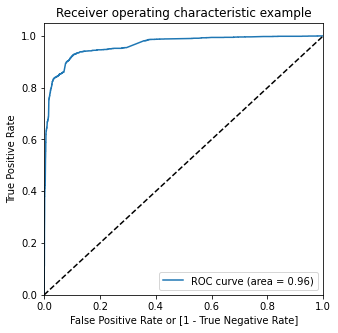

In [288]:
draw_roc(y_train_pred_final.Actual, y_train_pred_final.Predicted_Prob)

- The ROC score came very well for the train set, but there is a high chance of model overfitting

#### Finding the optimal point

In [289]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual,Predicted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.995541,1,1,1,1,1,1,1,1,1,1,1
1,0,0.535533,1,1,1,1,1,1,1,0,0,0,0
2,0,0.016526,0,1,0,0,0,0,0,0,0,0,0
3,1,0.992071,1,1,1,1,1,1,1,1,1,1,1
4,0,0.437571,0,1,1,1,1,1,0,0,0,0,0


In [290]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# ---------------------------------------------------------------------------------------------

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378796  1.000000  0.000000
0.1   0.1  0.807415  0.953499  0.718336
0.2   0.2  0.903204  0.931798  0.885768
0.3   0.3  0.909243  0.914969  0.905752
0.4   0.4  0.911760  0.896368  0.921145
0.5   0.5  0.912431  0.841453  0.955712
0.6   0.6  0.915283  0.826395  0.969484
0.7   0.7  0.909243  0.803366  0.973805
0.8   0.8  0.900017  0.767493  0.980826
0.9   0.9  0.867975  0.671833  0.987578


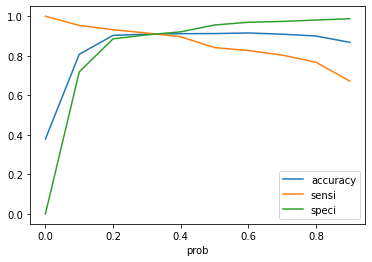

In [291]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [292]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Actual,Predicted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.995541,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.535533,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.016526,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.992071,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.437571,0,1,1,1,1,1,0,0,0,0,0,1


In [293]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

0.9092434155343063

In [294]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred_final['final_predicted'], drop_intermediate = False )

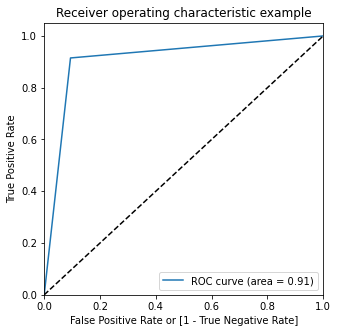

In [295]:
draw_roc(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

 #### Train Set ROC Score (for probability threshold 0.3)

In [297]:
auc_score = metrics.roc_auc_score( y_train_pred_final.Actual, y_train_pred_final.final_predicted )
auc_score

0.9103605460059555

In [298]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.final_predicted )
confusion2

array([[3354,  349],
       [ 192, 2066]], dtype=int64)

In [299]:
Confusion_Matrix(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

[[3354  349]
 [ 192 2066]]
False Positive rate :  9.424790710234944
correctly specified percentage :  90.92434155343064
Incorrectly specified percentage :  9.075658446569367
Positive Prediction rate(Precision) :  85.54865424430642
Negative Prediction Rate :  94.585448392555
Sensitivity(Recall) : 91.49689991142604
Specificity : 90.57520928976506


#### Making predictions on Test Set

In [300]:
X_train_final_3_selected_cols.columns

Index(['Total_Time_Spent', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Mobile Number Issue', 'Tags_Not Mentioned', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [301]:
X_test_final.columns

Index(['TotalVisits', 'Total_Time_Spent', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachabl

In [302]:
X_test_final_selected_cols = X_test_final[X_train_final_3_selected_cols.columns]

In [303]:
X_test_final_selected_cols.head()

,Total_Time_Spent,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Current_Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Mobile Number Issue,Tags_Not Mentioned,Tags_Ringing,Tags_Will revert after reading the email
0,0.557502,0,0,0,0,0,0,0,0,0,1,0,0
1,0.014376,0,0,0,0,0,0,0,0,0,1,0,0
2,0.000000,0,0,1,0,1,0,0,0,0,0,0,1
3,0.372417,0,0,0,0,0,0,0,0,0,1,0,0
4,0.533693,0,0,0,0,0,0,0,0,0,0,0,0


In [304]:
X_test_const = sm.add_constant(X_test_final_selected_cols)

In [305]:
y_test_pred = l4.predict(X_test_const)

In [306]:
y_test_pred

0       0.357001
1       0.099690
2       0.805370
3       0.242719
4       0.057220
          ...   
2551    0.176259
2552    0.037948
2553    0.417988
2554    0.012295
2555    0.083114
Length: 2556, dtype: float64

In [307]:
y_test

6403    0
714     0
5654    0
6201    1
1749    0
       ..
4099    0
7728    0
3328    1
7139    0
4103    0
Name: Converted, Length: 2556, dtype: int64

In [308]:
y_test.index = y_test_pred.index

In [309]:
y_test

0       0
1       0
2       0
3       1
4       0
       ..
2551    0
2552    0
2553    1
2554    0
2555    0
Name: Converted, Length: 2556, dtype: int64

In [310]:
# Appending y_test_df and y_pred_1
y_test_pred_df = pd.concat([y_test, y_test_pred],axis=1)

In [311]:
y_test_pred_df

,Converted,0
0,0,0.357001
1,0,0.099690
2,0,0.805370
3,1,0.242719
4,0,0.057220
...,...,...
2551,0,0.176259
2552,0,0.037948
2553,1,0.417988
2554,0,0.012295


In [312]:
y_test_pred_df = y_test_pred_df.rename(columns = {'Converted':'Actual',0: 'Predicted'})

In [313]:
y_test_pred_df

,Actual,Predicted
0,0,0.357001
1,0,0.099690
2,0,0.805370
3,1,0.242719
4,0,0.057220
...,...,...
2551,0,0.176259
2552,0,0.037948
2553,1,0.417988
2554,0,0.012295


In [314]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Predicted.map(lambda x: 1 if x > 0.3 else 0)

In [315]:
y_test_pred_df

,Actual,Predicted,final_predicted
0,0,0.357001,1
1,0,0.099690,0
2,0,0.805370,1
3,1,0.242719,0
4,0,0.057220,0
...,...,...,...
2551,0,0.176259,0
2552,0,0.037948,0
2553,1,0.417988,1
2554,0,0.012295,0


In [316]:
accuracy_score(y_test, y_test_pred_df['final_predicted'])

0.9014084507042254

In [317]:
Confusion_Matrix(y_test, y_test_pred_df['final_predicted'])

[[1429  177]
 [  75  875]]
False Positive rate :  11.021170610211705
correctly specified percentage :  90.14084507042254
Incorrectly specified percentage :  9.859154929577464
Positive Prediction rate(Precision) :  83.17490494296578
Negative Prediction Rate :  95.01329787234043
Sensitivity(Recall) : 92.10526315789474
Specificity : 88.97882938978829


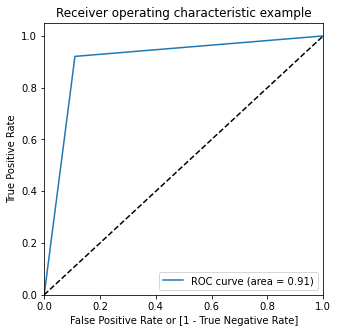

In [318]:
draw_roc(y_test_pred_df.Actual, y_test_pred_df.final_predicted)

#### Plotting a colorful confusion matrix

In [319]:
from sklearn.metrics import ConfusionMatrixDisplay

In [320]:
from sklearn.linear_model import LogisticRegression

In [321]:
lr = LogisticRegression()

lr.fit(X_train_final_3_selected_cols, y_train)

LogisticRegression()

In [322]:
y_train_pred_lr = lr.predict(X_train_final_3_selected_cols)

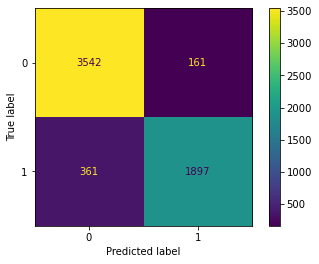

In [323]:
ConfusionMatrixDisplay.from_estimator(lr, X_train_final_3_selected_cols, y_train)
plt.show()

In [324]:
Confusion_Matrix(y_train, y_train_pred_lr)

[[3542  161]
 [ 361 1897]]
False Positive rate :  4.3478260869565215
correctly specified percentage :  91.24308002013085
Incorrectly specified percentage :  8.75691997986915
Positive Prediction rate(Precision) :  92.17687074829932
Negative Prediction Rate :  90.75070458621573
Sensitivity(Recall) : 84.01240035429583
Specificity : 95.65217391304348


In [325]:
y_test_pred_lr = lr.predict(X_test_final_selected_cols)

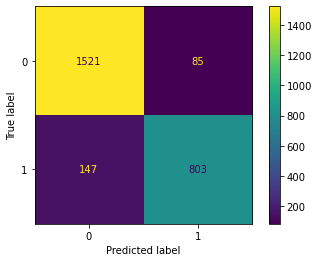

In [326]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_final_selected_cols, y_test)
plt.show()

In [327]:
Confusion_Matrix(y_test, y_test_pred_lr)

[[1521   85]
 [ 147  803]]
False Positive rate :  5.292652552926526
correctly specified percentage :  90.92331768388107
Incorrectly specified percentage :  9.076682316118937
Positive Prediction rate(Precision) :  90.42792792792793
Negative Prediction Rate :  91.18705035971223
Sensitivity(Recall) : 84.52631578947368
Specificity : 94.70734744707347


In [328]:
l4.params

const                                      -4.386190
Total_Time_Spent                            2.968498
Lead Source_Welingak Website                5.058857
Do Not Email_Yes                           -1.202933
Last Activity_Olark Chat Conversation      -0.989490
Last Activity_SMS Sent                      1.912310
Current_Occupation_Working Professional     0.492649
Tags_Busy                                   2.846922
Tags_Closed by Horizzon                     8.939460
Tags_Lost to EINS                           7.145202
Tags_Mobile Number Issue                   -1.294229
Tags_Not Mentioned                          2.142840
Tags_Ringing                               -1.154870
Tags_Will revert after reading the email    6.303230
dtype: float64

In [329]:
l4.params.sort_values(ascending=False)

Tags_Closed by Horizzon                     8.939460
Tags_Lost to EINS                           7.145202
Tags_Will revert after reading the email    6.303230
Lead Source_Welingak Website                5.058857
Total_Time_Spent                            2.968498
Tags_Busy                                   2.846922
Tags_Not Mentioned                          2.142840
Last Activity_SMS Sent                      1.912310
Current_Occupation_Working Professional     0.492649
Last Activity_Olark Chat Conversation      -0.989490
Tags_Ringing                               -1.154870
Do Not Email_Yes                           -1.202933
Tags_Mobile Number Issue                   -1.294229
const                                      -4.386190
dtype: float64

In [330]:
lr.coef_

array([[ 2.70833001,  3.81520693, -1.11730942, -0.95599617,  1.84092974,
         0.58207479,  2.22141439,  6.27094597,  5.39522786, -1.47526813,
         1.59311273, -1.56261672,  5.578871  ]])

In [331]:
X_test_final_selected_cols.columns

Index(['Total_Time_Spent', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Current_Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Mobile Number Issue', 'Tags_Not Mentioned', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Conclusion:
-----------------------
- So, we can say that we have built a model with 91.24% Accuracy which can provide approx 90% Accuracy on test set.
- Sensitivity or Recall or True Positive Prediction Rate has been found as 84%-92% for test set and for train set also it gave the same range which implies that approximately 84% to 92% cases it can classify the actual positive classes correctly.
- Specificity is also pretty good(~ 95%), which indicates approximately in 95% cases it can classify negative classes correctly.
- The Statsmodel and Scikit-learn model shows small amount of variation in their results.
- As per the business problem, it's very imporatnt to identify the potential leads, So here, identifying True Positive or metric 'Recall' is most important.
- So, This Logistic Regression model is a good model for this type of business problem.